# United States Natural Disasters in 2017
## 90-800 Exploratory Data Analysis and Visualization with Python (Fall 2023)
### **Names**: Chenkai Lin, Jewel Kentilitisca, Simon Isaza
#### **Date**: Sunday, Nov 26 2023

### **Table of contents**

1. Overview
2. Packages loading
3. Data loading
4. Data Cleaning
5. Data Transformation
6. Data exploration
7. Conclusions
8. References

### **1. Overview**

Gaining insights into natural disasters is essential for safeguarding lives and establishing a city that is secure, resilient, and sustainable. In this project, we are trying to discover the total damages caused by storms and the disaster funding corresponding to it and exam their alignment.

### **2. Packages loading**

In [28]:
# Packages needed
!pip install mapclassify
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import re
%matplotlib inline

pd.set_option("display.max_rows", 220)
pd.set_option('display.max_columns', None)

### **3. Dataset loading**

Our data comes from the [National Oceanic and Atmospheric Administration](https://www.ncdc.noaa.gov/stormevents/), specifically we consider storms [information](https://www.nws.noaa.gov/directives/sym/pd01016005curr.pdf).

**Countries**: United States

**Years**: 2017

####**Dataset 1: Storm Events details**

From: StormEvents_details-ftp_v1.0_d2017_c20230317.csv.gz  
StormEvents_details-ftp_v1.0_d2018_c20230616.csv.gz  
StormEvents_details-ftp_v1.0_d2019_c20231017.csv.gz  
StormEvents_details-ftp_v1.0_d2020_c20231116.csv.gz  
StormEvents_details-ftp_v1.0_d2021_c20231017.csv.gz  
StormEvents_details-ftp_v1.0_d2022_c20231116.csv.gz  


We want to use this dataset to calculate the state level damages caused by storm events in United States from 2017 to 2022

link to google drive : https://drive.google.com/file/d/1tyDkns7LR4lJStrYT2LuMUUOyxkJwiV7/view?usp=drive_link,

https://drive.google.com/file/d/1PCkvpK5r5Nz38LmRtHHujZ9IjoCRVzVe/view?usp=drive_link, https://drive.google.com/file/d/1MFy0xZJrdm9cEWdaKjR1buC3j_9XFjQj/view?usp=drive_link,

 https://drive.google.com/file/d/1PNM7ddsddbvjC06PbFz2MewapnvR8zQ9/view?usp=drive_link, https://drive.google.com/file/d/1PvR1aasaJwirGwXm-M-yRk1yQ-lNY8Ly/view?usp=drive_link,

  https://drive.google.com/file/d/1iKlWIY6NETJVGr89OHDPU6iKEgYlGz7O/view?usp=drive_link

In [29]:
#read the csv file

storm_data_2017 = pd.read_csv('StormEvents_details-ftp_v1.0_d2017_c20230317.csv')
storm_data_2018 = pd.read_csv('StormEvents_details-ftp_v1.0_d2018_c20230616.csv')
storm_data_2019 = pd.read_csv('StormEvents_details-ftp_v1.0_d2019_c20231017.csv')
storm_data_2020 = pd.read_csv('StormEvents_details-ftp_v1.0_d2020_c20231116.csv')
storm_data_2021 = pd.read_csv('StormEvents_details-ftp_v1.0_d2021_c20231017.csv')
storm_data_2022 = pd.read_csv('StormEvents_details-ftp_v1.0_d2022_c20231116.csv')


storm_data = pd.concat([storm_data_2017,storm_data_2018,storm_data_2019,storm_data_2020,storm_data_2021,storm_data_2022], axis = 0)
storm_data.sample(5)


BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
56398           202006          3        1107         202006        3   
43074           201910          8        2100         201910        9   
1908            202206         11        1706         202206       11   
20236           201702         25        1700         201702       25   
28495           202204         12           0         202204       25   

       END_TIME  EPISODE_ID  EVENT_ID           STATE  STATE_FIPS  YEAR  \
56398      1107      147189    885245    PENNSYLVANIA          42  2020   
43074      2100      141489    860321         MONTANA          30  2019   
1908       1706      169905   1029515         MONTANA          30  2022   
20236      1700      113680    705819  ATLANTIC NORTH          88  2017   
28495      2359      166611   1007809           TEXAS          48  2022   

      MONTH_NAME                EVENT_TYPE CZ_TYPE  CZ_FIPS  \
56398       June         Thunderstorm Wind       C       29   
43074    October                Heavy Snow       Z       22   
1908        June                      Hail       C       75   
20236   February  Marine Thunderstorm Wind       Z      542   
28495      April                   Drought       Z      253   

                                   CZ_NAME  WFO     BEGIN_DATE_TIME  \
56398                              CHESTER  PHI  03-JUN-20 11:07:00   
43074                             GARFIELD  GGW  08-OCT-19 21:00:00   
1908                          POWDER RIVER  BYZ  11-JUN-22 17:06:00   
20236  PATUXENT RIVER TO BROOMES ISLAND MD  LWX  25-FEB-17 17:00:00   
28495              SOUTHERN HIDALGO COUNTY  BRO  12-APR-22 00:00:00   

      CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  INJURIES_INDIRECT  \
56398       EST-5  03-JUN-20 11:07:00                0                  0   
43074       MST-7  09-OCT-19 21:00:00                0                  0   
1908        MST-7  11-JUN-22 17:06:00                0                  0   
20236       EST-5  25-FEB-17 17:00:00                0                  0   
28495       CST-6  25-APR-22 23:59:00                0                  0   

       DEATHS_DIRECT  DEATHS_INDIRECT DAMAGE_PROPERTY DAMAGE_CROPS  \
56398              0                0             NaN          NaN   
43074              0                0           0.00K        0.00K   
1908               0                0           0.00K        0.00K   
20236              1                0             NaN          NaN   
28495              0                0           0.00K        0.00K   

                SOURCE  MAGNITUDE MAGNITUDE_TYPE FLOOD_CAUSE  CATEGORY  \
56398  Utility Company      52.00             EG         NaN       NaN   
43074     Social Media        NaN            NaN         NaN       NaN   
1908            Public       0.75            NaN         NaN       NaN   
20236        Newspaper      35.00             EG         NaN       NaN   
28495  Drought Monitor        NaN            NaN         NaN       NaN   

      TOR_F_SCALE  TOR_LENGTH  TOR_WIDTH TOR_OTHER_WFO TOR_OTHER_CZ_STATE  \
56398         NaN         NaN        NaN           NaN                NaN   
43074         NaN         NaN        NaN           NaN                NaN   
1908          NaN         NaN        NaN           NaN                NaN   
20236         NaN         NaN        NaN           NaN                NaN   
28495         NaN         NaN        NaN           NaN                NaN   

       TOR_OTHER_CZ_FIPS TOR_OTHER_CZ_NAME  BEGIN_RANGE BEGIN_AZIMUTH  \
56398                NaN               NaN          0.0             N   
43074                NaN               NaN          NaN           NaN   
1908                 NaN               NaN          6.0             N   
20236                NaN               NaN          1.0           ESE   
28495                NaN               NaN          NaN           NaN   

                BEGIN_LOCATION  END_RANGE END_AZIMUTH  \
56398             VALLE

In [30]:
# number of columns and rows
print('Rows:', storm_data.shape[0])
print('Columns:', storm_data.shape[1])

Rows: 379841
Columns: 51


In [31]:
# Columns Data Types
storm_data.dtypes

BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID              int64
EVENT_ID                int64
STATE                  object
STATE_FIPS              int64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH 

####**Dataset 2: State boundaries (generalized for mapping)**

From: https://www.sciencebase.gov/catalog/item/imap/52c78623e4b060b9ebca5be5  \

We want to use this shapfile to draw a US map.

Link to google drive: https://drive.google.com/drive/folders/1pgLl8CBfM-3g-DZSPBYP0UgI_WXLOf-n?usp=drive_link

In [32]:
# read the shapefile
file_path = 'tl_2012_us_state/tl_2012_us_state.shp'
US = gpd.read_file(file_path)
US = US[~US['NAME'].isin(['Hawaii', 'American Samoa', 'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands', 'Alaska', 'Guam'])]
US.head(5)

OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS          NAME LSAD  \
1         2      3        7      05  00068085    05     AR      Arkansas   00   
2         3      4        8      35  00897535    35     NM    New Mexico   00   
3         4      4        8      30  00767982    30     MT       Montana   00   
4         5      1        2      36  01779796    36     NY      New York   00   
5         6      2        4      38  01779797    38     ND  North Dakota   00   

   MTFCC FUNCSTAT         ALAND        AWATER     INTPTLAT      INTPTLON  \
1  G4000        A  1.347726e+11  2.959210e+09  +34.8955256  -092.4446262   
2  G4000        A  3.141611e+11  7.564385e+08  +34.4346843  -106.1316181   
3  G4000        A  3.769636e+11  3.868565e+09  +47.0511771  -109.6348174   
4  G4000        A  1.220579e+11  1.923885e+10  +42.9133974  -075.5962723   
5  G4000        A  1.787088e+11  4.398957e+09  +47.4421698  -100.4608163   

     Shape_Leng    Shape_Area  \
1  2.656648e+06  2.053261e+11   
2  2.900368e+06  4.643927e+11   
3  4.607246e+06  8.201836e+11   
4  3.212630e+06  2.637702e+11   
5  3.124857e+06  4.003467e+11   

                                            geometry  
1  POLYGON ((-10515267.713 4101325.818, -10515269...  
2  POLYGON ((-12138963.727 4106855.170, -12138964...  
3  POLYGON ((-12727480.235 5886876.586, -12727567...  
4  MULTIPOLYGON (((-8866092.533 5160809.769, -886...  
5  POLYGON ((-11582613.606 6227717.739, -11582612...

####**Dataset 3: FEMA Disaster Funding**

From: https://www.fema.gov/emergency-managers/national-preparedness/frameworks/national-disaster-recovery/support-functions/rsflg/charts  \

We want to use this shapfile to draw a US map.

Link to google drive: https://drive.google.com/file/d/1XA0YHzYmrThXBjoT76HD-h5FC7eujuVo/view?usp=drive_link

In [33]:
# import the fema dataset
fema = pd.read_csv('FEMA_FUNDING_2017_2019.csv')

### **4. Data Cleaning**

In [34]:
# Missing values
pd.concat({"Number missing values":storm_data.isnull().sum()
            , "Percentage of missing values":storm_data.isnull().sum()*100/storm_data.shape[0]}
            , axis=1)

Number missing values  Percentage of missing values
BEGIN_YEARMONTH                         0                      0.000000
BEGIN_DAY                               0                      0.000000
BEGIN_TIME                              0                      0.000000
END_YEARMONTH                           0                      0.000000
END_DAY                                 0                      0.000000
END_TIME                                0                      0.000000
EPISODE_ID                              0                      0.000000
EVENT_ID                                0                      0.000000
STATE                                   0                      0.000000
STATE_FIPS                              0                      0.000000
YEAR                                    0                      0.000000
MONTH_NAME                              0                      0.000000
EVENT_TYPE                              0                      0.000000
CZ_TYPE                                 0                      0.000000
CZ_FIPS                                 0                      0.000000
CZ_NAME                                 0                      0.000000
WFO                                     0                      0.000000
BEGIN_DATE_TIME                         0                      0.000000
CZ_TIMEZONE                             0                      0.000000
END_DATE_TIME                           0                      0.000000
INJURIES_DIRECT                         0                      0.000000
INJURIES_INDIRECT                       0                      0.000000
DEATHS_DIRECT                           0                      0.000000
DEATHS_INDIRECT                         0                      0.000000
DAMAGE_PROPERTY                     77922                     20.514373
DAMAGE_CROPS                        76243                     20.072346
SOURCE                                  0                      0.000000
MAGNITUDE                          183236                     48.240185
MAGNITUDE_TYPE                     231786                     61.021849
FLOOD_CAUSE                        336320                     88.542311
CATEGORY                           379594                     99.934973
TOR_F_SCALE                        371030                     97.680345
TOR_LENGTH                         371030                     97.680345
TOR_WIDTH                          371030                     97.680345
TOR_OTHER_WFO                      378672                     99.692240
TOR_OTHER_CZ_STATE                 378672                     99.692240
TOR_OTHER_CZ_FIPS                  378672                     99.692240
TOR_OTHER_CZ_NAME                  378672                     99.692240
BEGIN_RANGE                        148134                     38.998950
BEGIN_AZIMUTH                      148134                     38.998950
BEGIN_LOCATION                     148134                     38.998950
END_RANGE                          148134                     38.998950
END_AZIMUTH                        148134                     38.998950
END_LOCATION                       148134                     38.998950
BEGIN_LAT                          148134                     38.998950
BEGIN_LON                          148134                     38.998950
END_LAT                            148134                     38.998950
END_LON                            148134                     38.998950
EPISODE_NARRATIVE                       0                      0.000000
EVENT_NARRATIVE                     76967                     20.262952
DATA_SOURCE                             0                      0.000000

In [35]:
# Columns that have above 95% of their data missing
top_missing = storm_data.isnull().sum()*100/storm_data.shape[0]
top_missing_list = top_missing[top_missing>95].index
top_missing_list

Index(['CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME'],
      dtype='object')

#### CATEGORY

In [36]:
# review if the items that do not have null values have something in common
storm_data[storm_data['CATEGORY'].isnull()==False]

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
351             201709         20        1100         201709       20   
352             201709         20        1100         201709       20   
355             201709         20        1100         201709       20   
375             201709         20        1100         201709       20   
376             201709         20        1100         201709       20   
...                ...        ...         ...            ...      ...   
51887           202211          9        1700         202211       10   
66334           202209         28        1500         202209       28   
66624           202209         28        1000         202209       28   
66625           202209         28        1200         202209       28   
66626           202209         28        1500         202209       28   

       END_TIME  EPISODE_ID  EVENT_ID        STATE  STATE_FIPS  YEAR  \
351        2300      120357    721909  PUERTO RICO          99  2017   
352        2300      120357    721910  PUERTO RICO          99  2017   
355        2300      120357    721916  PUERTO RICO          99  2017   
375        2300      120357    721917  PUERTO RICO          99  2017   
376        2300      120357    721918  PUERTO RICO          99  2017   
...         ...         ...       ...          ...         ...   ...   
51887      1500      175864   1067697      FLORIDA          12  2022   
66334      2100      174305   1058309      FLORIDA          12  2022   
66624      1700      174305   1058306      FLORIDA          12  2022   
66625      1700      174305   1058307      FLORIDA          12  2022   
66626      2300      174305   1058310      FLORIDA          12  2022   

      MONTH_NAME EVENT_TYPE CZ_TYPE  CZ_FIPS                 CZ_NAME  WFO  \
351    September  Hurricane       Z        4        EASTERN INTERIOR  SJU   
352    September  Hurricane       Z        4        EASTERN INTERIOR  SJU   
355    September  Hurricane       Z        6        CENTRAL INTERIOR  SJU   
375    September  Hurricane       Z        6        CENTRAL INTERIOR  SJU   
376    September  Hurricane       Z        6        CENTRAL INTERIOR  SJU   
...          ...        ...     ...      ...                     ...  ...   
51887   November  Hurricane       Z      254     INLAND INDIAN RIVER  MLB   
66334  September  Hurricane       Z       66                  HENDRY  MFL   
66624  September  Hurricane       Z       69  COASTAL COLLIER COUNTY  MFL   
66625  September  Hurricane       Z       70   INLAND COLLIER COUNTY  MFL   
66626  September  Hurricane       Z       63                  GLADES  MFL   

          BEGIN_DATE_TIME CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  \
351    20-SEP-17 11:00:00       AST-4  20-SEP-17 23:00:00                0   
352    20-SEP-17 11:00:00       AST-4  20-SEP-17 23:00:00                0   
355    20-SEP-17 11:00:00       AST-4  20-SEP-17 23:00:00                0   
375    20-SEP-17 11:00:00       AST-4  20-SEP-17 23:00:00                0   
376    20-SEP-17 11:00:00       AST-4  20-SEP-17 23:00:00                0   
...                   ...         ...                 ...              ...   
51887  09-NOV-22 17:00:00       EST-5  10-NOV-22 15:00:00                0   
66334  28-SEP-22 15:00:00       EST-5  28-SEP-22 21:00:00                0   
66624  28-SEP-22 10:00:00       EST-5  28-SEP-22 17:00:00                0   
66625  28-SEP-22 12:00:00       EST-5  28-SEP-22 17:00:00                0   
66626  28-SEP-22 15:00:00       EST-5  28-SEP-22 23:00:00                0   

       INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT DAMAGE_PROPERTY  \
351                    0              0                0         500.00K   
352                    0              0                0         500.00K   
355                    0              0                0         500.00K   
375                    0              0                0         500.00K   
376                    

In [37]:
# Check the distribution of EVENT_TYPE vs CATEGORY
#storm_data.pivot_table('EVENT_ID','EVENT_TYPE','CATEGORY',aggfunc='count',dropna=False)
storm_data[['EVENT_ID','EVENT_TYPE','CATEGORY']].groupby(by=['EVENT_TYPE','CATEGORY'],dropna=False).count().unstack()

EVENT_ID                                 
CATEGORY                        1.0   2.0   3.0   4.0  5.0       NaN
EVENT_TYPE                                                          
Astronomical Low Tide           NaN   NaN   NaN   NaN  NaN     144.0
Avalanche                       NaN   NaN   NaN   NaN  NaN     173.0
Blizzard                        NaN   NaN   NaN   NaN  NaN    3591.0
Coastal Flood                   NaN   NaN   NaN   NaN  NaN    1345.0
Cold/Wind Chill                 NaN   NaN   NaN   NaN  NaN    3204.0
Debris Flow                     NaN   NaN   NaN   NaN  NaN     995.0
Dense Fog                       NaN   NaN   NaN   NaN  NaN    4101.0
Dense Smoke                     NaN   NaN   NaN   NaN  NaN      80.0
Drought                         NaN   NaN   NaN   NaN  NaN   17844.0
Dust Devil                      NaN   NaN   NaN   NaN  NaN      37.0
Dust Storm                      NaN   NaN   NaN   NaN  NaN     627.0
Excessive Heat                  NaN   NaN   NaN   NaN  NaN    5109.0
Extreme Cold/Wind Chill         NaN   NaN   NaN   NaN  NaN    5159.0
Flash Flood                     NaN   NaN   NaN   NaN  NaN   23585.0
Flood                           NaN   NaN   NaN   NaN  NaN   18941.0
Freezing Fog                    NaN   NaN   NaN   NaN  NaN      56.0
Frost/Freeze                    NaN   NaN   NaN   NaN  NaN    3655.0
Funnel Cloud                    NaN   NaN   NaN   NaN  NaN    1603.0
Hail                            NaN   NaN   NaN   NaN  NaN   48382.0
Heat                            NaN   NaN   NaN   NaN  NaN    7513.0
Heavy Rain                      NaN   NaN   NaN   NaN  NaN    8693.0
Heavy Snow                      NaN   NaN   NaN   NaN  NaN   13226.0
High Surf                       NaN   NaN   NaN   NaN  NaN    2555.0
High Wind                       NaN   NaN   NaN   NaN  NaN   23760.0
Hurricane                     139.0  41.0  26.0  37.0  4.0       NaN
Ice Storm                       NaN   NaN   NaN   NaN  NaN    1506.0
Lake-Effect Snow                NaN   NaN   NaN   NaN  NaN     507.0
Lakeshore Flood                 NaN   NaN   NaN   NaN  NaN     305.0
Lightning                       NaN   NaN   NaN   NaN  NaN    1852.0
Marine Dense Fog                NaN   NaN   NaN   NaN  NaN       9.0
Marine Hail                     NaN   NaN   NaN   NaN  NaN     168.0
Marine High Wind                NaN   NaN   NaN   NaN  NaN     426.0
Marine Hurricane/Typhoon        NaN   NaN   NaN   NaN  NaN      70.0
Marine Strong Wind              NaN   NaN   NaN   NaN  NaN      51.0
Marine Thunderstorm Wind        NaN   NaN   NaN   NaN  NaN   14830.0
Marine Tropical Depression      NaN   NaN   NaN   NaN  NaN      23.0
Marine Tropical Storm           NaN   NaN   NaN   NaN  NaN     440.0
Rip Current                     NaN   NaN   NaN   NaN  NaN     530.0
Seiche                          NaN   NaN   NaN   NaN  NaN      12.0
Sleet                           NaN   NaN   NaN   NaN  NaN     152.0
Sneakerwave                     NaN   NaN   NaN   NaN  NaN      12.0
Storm Surge/Tide                NaN   NaN   NaN   NaN  NaN     349.0
Strong Wind                     NaN   NaN   NaN   NaN  NaN    6833.0
Thunderstorm Wind               NaN   NaN   NaN   NaN  NaN  102155.0
Tornado                         NaN   NaN   NaN   NaN  NaN    8811.0
Tropical Depression             NaN   NaN   NaN   NaN  NaN     171.0
Tropical Storm                  NaN   NaN   NaN   NaN  NaN    2037.0
Tsunami                         NaN   NaN   NaN   NaN  NaN       9.0
Volcanic Ashfall                NaN   NaN   NaN   NaN  NaN      66.0
Waterspout                      NaN   NaN   NaN   NaN  NaN    1206.0
Wildfire                        NaN   NaN   NaN   NaN  NaN    2158.0
Winter Storm                    NaN   NaN   NaN   NaN  NaN   17758.0
Winter Weather                  NaN   NaN   NaN   NaN  NaN   22770.0

As we thought, the category only applies to Hurricane events. Therefore, we won't drop it. Instead, we will create another category as 0.

In [38]:
# fill missing category values with Zero.
storm_data['CATEGORY'].fillna(0,inplace=True)

#### TOR_F_SCALE, TOR_LENGTH, TOR_WIDTH, TOR_OTHER_WFO, TOR_OTHER_CZ_STATE, TOR_OTHER_CZ_FIPS, TOR_OTHER_CZ_NAME

In [39]:
storm_data[storm_data['TOR_F_SCALE'].isnull()==False].sample(10)

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
54117           202112         11         327         202112       11   
37844           202204         29        1913         202204       29   
26140           202204         23        1801         202204       23   
44645           201707         20        1229         201707       20   
12395           202005         17        1701         202005       17   
22633           202205         21        1345         202205       21   
48575           201705         19        1925         201705       19   
16735           202004         12        1036         202004       12   
38451           202205          7        1937         202205        7   
62869           201911         27         926         201911       27   

       END_TIME  EPISODE_ID  EVENT_ID         STATE  STATE_FIPS  YEAR  \
54117       336      164737    997250      KENTUCKY          21  2021   
37844      1931      167984   1016769        KANSAS          20  2022   
26140      1810      168322   1024991      OKLAHOMA          40  2022   
44645      1230      119470    717000      NEW YORK          36  2017   
12395      1702      148656    895547     LOUISIANA          22  2020   
22633      1348      170112   1031276      ARKANSAS           5  2022   
48575      1936      114786    688537        KANSAS          20  2017   
16735      1045      146038    879880     LOUISIANA          22  2020   
38451      1937      168183   1021676  SOUTH DAKOTA          46  2022   
62869       930      144257    865869       ALABAMA           1  2019   

      MONTH_NAME EVENT_TYPE CZ_TYPE  CZ_FIPS   CZ_NAME  WFO  \
54117   December    Tornado       C      155    MARION  LMK   
37844      April    Tornado       C       15    BUTLER  ICT   
26140      April    Tornado       C       51     GRADY  OUN   
44645       July    Tornado       C        3  ALLEGANY  BUF   
12395        May    Tornado       C       23   CAMERON  LCH   
22633        May    Tornado       C      101    NEWTON  LZK   
48575        May    Tornado       C       17     CHASE  ICT   
16735      April    Tornado       C       73  OUACHITA  SHV   
38451        May    Tornado       C       13     BROWN  ABR   
62869   November    Tornado       C        5   BARBOUR  BMX   

          BEGIN_DATE_TIME CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  \
54117  11-DEC-21 03:27:00       EST-5  11-DEC-21 03:36:00                1   
37844  29-APR-22 19:13:00       CST-6  29-APR-22 19:31:00                1   
26140  23-APR-22 18:01:00       CST-6  23-APR-22 18:10:00                0   
44645  20-JUL-17 12:29:00       EST-5  20-JUL-17 12:30:00                0   
12395  17-MAY-20 17:01:00       CST-6  17-MAY-20 17:02:00                0   
22633  21-MAY-22 13:45:00       CST-6  21-MAY-22 13:48:00                0   
48575  19-MAY-17 19:25:00       CST-6  19-MAY-17 19:36:00                0   
16735  12-APR-20 10:36:00       CST-6  12-APR-20 10:45:00                0   
38451  07-MAY-22 19:37:00       CST-6  07-MAY-22 19:37:00                0   
62869  27-NOV-19 09:26:00       CST-6  27-NOV-19 09:30:00                0   

       INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT DAMAGE_PROPERTY  \
54117                  0              0                0             NaN   
37844                  3              0                0          37.00M   
26140                  0              0                0          10.00K   
44645                  0              0                0          25.00K   
12395                  0              0                0           0.00K   
22633                  0              0                0           0.00K   
48575                  0              0                0           0.00K   
16735                  0              0                0         250.00M   
38451                  0              0                0             NaN   
62869                  0              0                0           0.00K   

      DAM

The TOR_<> variables are very particular for the Tornados event type. As our interest doesn't have the purpose of studying them in detail, we will drop these columns.

In [40]:
# drop the TOR_<> columns
storm_data.drop(columns=['TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE','TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME'], inplace=True)

#### DAMAGE

US Dollar values and rounded to three significant digits, followed by the magnitude of the value (i.e., 1.55 Billion $USD for $1,550,000,000). Values used to signify magnitude include: Thousand $USD, Million $USD, and Billion $USD. If additional precision is available, it may be provided in the narrative part of the entry.

In [41]:
# Convert the damage columns to integers

def convert_to_number(value):
    if pd.isna(value):
        return 0
    multiplier = 1
    if 'K' in value:
        multiplier = 1000
        value = value.replace('K', '')
    elif 'M' in value:
        multiplier = 1000000
        value = value.replace('M', '')
    elif 'B' in value:
        multiplier = 1000000000
        value = value.replace('B', '')
    try:
        return float(value) * multiplier
    except ValueError:
        return 0

storm_data['DAMAGE_PROPERTY'] = storm_data['DAMAGE_PROPERTY'].apply(convert_to_number)
storm_data['DAMAGE_CROPS'] = storm_data['DAMAGE_CROPS'].apply(convert_to_number)

# Create new column of total damage
storm_data['DAMAGE_TOTAL'] = storm_data['DAMAGE_PROPERTY'] + storm_data['DAMAGE_CROPS']
storm_data.head(5)

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           201704          6        1509         201704        6      1509   
1           201704          6         930         201704        6       940   
2           201704          5        1749         201704        5      1753   
3           201704         16        1759         201704       16      1900   
4           201704         15        1550         201704       15      1550   

   EPISODE_ID  EVENT_ID       STATE  STATE_FIPS  YEAR MONTH_NAME  \
0      113355    678791  NEW JERSEY          34  2017      April   
1      113459    679228     FLORIDA          12  2017      April   
2      113448    679268        OHIO          39  2017      April   
3      113697    682042        OHIO          39  2017      April   
4      113683    682062    NEBRASKA          31  2017      April   

          EVENT_TYPE CZ_TYPE  CZ_FIPS     CZ_NAME  WFO     BEGIN_DATE_TIME  \
0  Thunderstorm Wind       C       15  GLOUCESTER  PHI  06-APR-17 15:09:00   
1            Tornado       C       71         LEE  TBW  06-APR-17 09:30:00   
2  Thunderstorm Wind       C       57      GREENE  ILN  05-APR-17 17:49:00   
3              Flood       C       25    CLERMONT  ILN  16-APR-17 17:59:00   
4               Hail       C       25        CASS  OAX  15-APR-17 15:50:00   

  CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  INJURIES_INDIRECT  \
0       EST-5  06-APR-17 15:09:00                0                  0   
1       EST-5  06-APR-17 09:40:00                1                  0   
2       EST-5  05-APR-17 17:53:00                0                  0   
3       EST-5  16-APR-17 19:00:00                0                  0   
4       CST-6  15-APR-17 15:50:00                0                  0   

   DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  DAMAGE_CROPS  \
0              0                0              0.0           0.0   
1              0                0         110000.0           0.0   
2              0                0           1000.0           0.0   
3              0                0           5000.0           0.0   
4              0                0              0.0           0.0   

              SOURCE  MAGNITUDE MAGNITUDE_TYPE FLOOD_CAUSE  CATEGORY  \
0    Trained Spotter       52.0             EG         NaN       0.0   
1  Emergency Manager        NaN            NaN         NaN       0.0   
2      Amateur Radio       50.0             EG         NaN       0.0   
3             Public        NaN            NaN  Heavy Rain       0.0   
4    Trained Spotter        1.5            NaN         NaN       0.0   

   BEGIN_RANGE BEGIN_AZIMUTH BEGIN_LOCATION  END_RANGE END_AZIMUTH  \
0          1.0            NW    FRIES MILLS        1.0          NW   
1          1.0             S    PUNTA RASSA        1.0          SW   
2          3.0            NE       FAIRBORN        3.0          NE   
3          1.0            NW     SUMMERSIDE        1.0          NW   
4          2.0           ENE      COLE ARPT        2.0         ENE   

        END_LOCATION  BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  \
0        FRIES MILLS    39.6600   -75.0800  39.6600 -75.0800   
1  FORT MYERS VILLAS    26.5010   -81.9980  26.5339 -81.8836   
2           FAIRBORN    39.8500   -83.9900  39.8500 -83.9900   
3         SUMMERSIDE    39.1065   -84.2875  39.1061 -84.2874   
4          COLE ARPT    40.9800   -95.8900  40.9800 -95.8900   

                                   EPISODE_NARRATIVE  \
0  Low pressure tracked from the Ohio Valley into...   
1  A line of thunderstorms developed along a pref...   
2  Showers and thunderstorms developed ahead of a...   
3  Thunderstorms with very heavy rain developed a...   
4  An upper level storm system moved into Nebrask...   

                                     EVENT_NARRATIVE DATA_SOURCE  DAMAGE_TOTAL  
0  A couple of trees were taken down due to thund...         CSV           0.0  
1  Emergency management reported and broadcast me...         CSV

In [42]:
#FINDING THE TOTAL DAMAGES SUM OF ALL STORM EVENTS OF 2017
print('Total Damage cost for all events in 2017:', storm_data['DAMAGE_TOTAL'].sum())

Total Damage cost for all events in 2017: 195953702350.0


#### MAGNITUDE

In [43]:
# Check the distribution of EVENT_TYPE vs MAGNITUDE
storm_data[['EVENT_ID','EVENT_TYPE','MAGNITUDE']].groupby(by=['EVENT_TYPE','MAGNITUDE'],dropna=False).count().unstack()

EVENT_ID                                            \
MAGNITUDE                    0.13   0.25   0.30   0.35   0.38   0.50   0.70     
EVENT_TYPE                                                                      
Astronomical Low Tide           NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Avalanche                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Blizzard                        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Coastal Flood                   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Cold/Wind Chill                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Debris Flow                     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Dense Fog                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Dense Smoke                     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Drought                         NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Dust Devil                      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Dust Storm                      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Excessive Heat                  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Extreme Cold/Wind Chill         NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Flash Flood                     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Flood                           NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Freezing Fog                    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Frost/Freeze                    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Funnel Cloud                    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Hail                            3.0  255.0    1.0    1.0    1.0   26.0   23.0   
Heat                            NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Heavy Rain                      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Heavy Snow                      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
High Surf                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
High Wind                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Hurricane                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Ice Storm                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lake-Effect Snow                NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lakeshore Flood                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Lightning                       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine Dense Fog                NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine Hail                     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine High Wind                NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine Hurricane/Typhoon        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine Strong Wind              NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine Thunderstorm Wind        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine Tropical Depression      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Marine Tropical Storm           NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Rip Current                     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Seiche                          NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Sleet                           NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Sneakerwave                     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Storm Surge/Tide                NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Strong Wind                     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Thunderstorm Wind               NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Tornado                         NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Tropical Depression             NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Tropical Storm                  NaN    NaN    NaN    NaN  

The values correspond to the size of the hailstones and are given in hundredths of an inch (0.50, 0.75, 0.88, 1.00, 1.50, etc.), which are the most common. The missing values will be filled with 0 as they correspond to events that did not have hail.

In [44]:
storm_data['MAGNITUDE'].fillna(0,inplace=True)

#### MAGNITUDE_TYPE

Refers in how the Storm Data software program whether the High Wind was a measured gust (MG), estimated gust (EG), measured sustained (MS), or estimated sustained A-35 (ES).

This detail is not of interest; the column will be dropped.

In [45]:
# Check the distribution of EVENT_TYPE vs MAGNITUDE_TYPE
storm_data[['EVENT_ID','EVENT_TYPE','MAGNITUDE_TYPE']].groupby(by=['EVENT_TYPE','MAGNITUDE_TYPE'],dropna=False).count().unstack()

EVENT_ID                                 
MAGNITUDE_TYPE                   EG     ES       MG      MS      NaN
EVENT_TYPE                                                          
Astronomical Low Tide           NaN    NaN      NaN     NaN    144.0
Avalanche                       NaN    NaN      NaN     NaN    173.0
Blizzard                        NaN    NaN      NaN     NaN   3591.0
Coastal Flood                   NaN    NaN      NaN     NaN   1345.0
Cold/Wind Chill                 NaN    NaN      NaN     NaN   3204.0
Debris Flow                     NaN    NaN      NaN     NaN    995.0
Dense Fog                       NaN    NaN      NaN     NaN   4101.0
Dense Smoke                     NaN    NaN      NaN     NaN     80.0
Drought                         NaN    NaN      NaN     NaN  17844.0
Dust Devil                      NaN    NaN      NaN     NaN     37.0
Dust Storm                      NaN    NaN      NaN     NaN    627.0
Excessive Heat                  NaN    NaN      NaN     NaN   5109.0
Extreme Cold/Wind Chill         NaN    NaN      NaN     NaN   5159.0
Flash Flood                     NaN    NaN      NaN     NaN  23585.0
Flood                           NaN    NaN      NaN     NaN  18941.0
Freezing Fog                    NaN    NaN      NaN     NaN     56.0
Frost/Freeze                    NaN    NaN      NaN     NaN   3655.0
Funnel Cloud                    NaN    NaN      NaN     NaN   1603.0
Hail                            NaN    NaN      NaN     NaN  48382.0
Heat                            NaN    NaN      NaN     NaN   7513.0
Heavy Rain                      NaN    NaN      NaN     NaN   8693.0
Heavy Snow                      NaN    NaN      NaN     NaN  13226.0
High Surf                       NaN    NaN      NaN     NaN   2555.0
High Wind                    4155.0  129.0  17052.0  2424.0      NaN
Hurricane                       NaN    NaN      NaN     NaN    247.0
Ice Storm                       NaN    NaN      NaN     NaN   1506.0
Lake-Effect Snow                NaN    NaN      NaN     NaN    507.0
Lakeshore Flood                 NaN    NaN      NaN     NaN    305.0
Lightning                       NaN    NaN      NaN     NaN   1852.0
Marine Dense Fog                NaN    NaN      NaN     NaN      9.0
Marine Hail                     NaN    NaN      NaN     NaN    168.0
Marine High Wind               17.0    NaN    400.0     9.0      NaN
Marine Hurricane/Typhoon        NaN    NaN      NaN     NaN     70.0
Marine Strong Wind             17.0    1.0     32.0     1.0      NaN
Marine Thunderstorm Wind     1720.0   15.0  13081.0    14.0      NaN
Marine Tropical Depression      NaN    NaN      NaN     NaN     23.0
Marine Tropical Storm           NaN    NaN      NaN     NaN    440.0
Rip Current                     NaN    NaN      NaN     NaN    530.0
Seiche                          NaN    NaN      NaN     NaN     12.0
Sleet                           NaN    NaN      NaN     NaN    152.0
Sneakerwave                     NaN    NaN      NaN     NaN     12.0
Storm Surge/Tide                NaN    NaN      NaN     NaN    349.0
Strong Wind                  4626.0   16.0   2147.0    44.0      NaN
Thunderstorm Wind           86924.0    9.0  15217.0     5.0      NaN
Tornado                         NaN    NaN      NaN     NaN   8811.0
Tropical Depression             NaN    NaN      NaN     NaN    171.0
Tropical Storm                  NaN    NaN      NaN     NaN   2037.0
Tsunami                         NaN    NaN      NaN     NaN      9.0
Volcanic Ashfall                NaN    NaN      NaN     NaN     66.0
Waterspout                      NaN    NaN      NaN     NaN   1206.0
Wildfire                        NaN    NaN      NaN     NaN   2158.0
Winter Storm                    NaN    NaN      NaN     NaN  17758.0
Winter Weather                  NaN    NaN      NaN     NaN  22770.0

In [46]:
# drop MAGNITUDE_TYPE column
storm_data.drop(columns=['MAGNITUDE_TYPE'], inplace=True)

#### FLOOD_CAUSE

In [47]:
# Check the distribution FLOOD_CAUSE
storm_data[['EVENT_ID','FLOOD_CAUSE']].groupby(by=['FLOOD_CAUSE'],dropna=False).count()

EVENT_ID
FLOOD_CAUSE                           
Dam / Levee Break                   95
Heavy Rain                       39443
Heavy Rain / Burn Area             614
Heavy Rain / Snow Melt            2107
Heavy Rain / Tropical System       876
Ice Jam                            275
Planned Dam Release                111
NaN                             336320

In this case, we will create another category ('No flood') to identify the missing values as events without floods.

In [48]:
storm_data['FLOOD_CAUSE'].fillna('No Flood',inplace=True)

#### BEGIN_RANGE, BEGIN_AZIMUTH, BEGIN_LOCATION, END_RANGE, END_AZIMUTH, END_LOCATION, BEGIN_LAT, BEGIN_LON, END_LAT, END_LON

In [49]:
storm_data[storm_data['BEGIN_RANGE'].isnull()==False].sample(10)

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
21641           202204         12        1713         202204       12   
29392           201805          4        1745         201805        4   
11424           201903         12        2030         201903       13   
35961           201708          2        1231         201708        2   
37383           201906          1        1607         201906        1   
42409           202208          6         600         202208        6   
17464           202205          5        1153         202205        5   
44887           201807          6        1439         201807        6   
26608           202006         22        1907         202006       22   
18085           202001         11        1324         202001       11   

       END_TIME  EPISODE_ID  EVENT_ID         STATE  STATE_FIPS  YEAR  \
21641      1713      168752   1021907     LOUISIANA          22  2022   
29392      1745      126731    759743      NEW YORK          36  2018   
11424       400      135475    812528      MISSOURI          29  2019   
35961      1231      117299    709162  PENNSYLVANIA          42  2017   
37383      1608      139402    838539       INDIANA          18  2019   
42409       600      171163   1039084      DELAWARE          10  2022   
17464      1155      169793   1028735      ARKANSAS           5  2022   
44887      1445      128955    773282   MISSISSIPPI          28  2018   
26608      1907      147661    891043         TEXAS          48  2020   
18085      1326      144767    873864      KENTUCKY          21  2020   

      MONTH_NAME         EVENT_TYPE CZ_TYPE  CZ_FIPS      CZ_NAME  WFO  \
21641      April               Hail       C      103  ST. TAMMANY  LIX   
29392        May  Thunderstorm Wind       C       65       ONEIDA  BGM   
11424      March        Flash Flood       C      225      WEBSTER  SGF   
35961     August  Thunderstorm Wind       C      109       SNYDER  CTP   
37383       June               Hail       C       39      ELKHART  IWX   
42409     August         Heavy Rain       C        5       SUSSEX  PHI   
17464        May            Tornado       C        1     ARKANSAS  LZK   
44887       July  Thunderstorm Wind       C       95       MONROE  MEG   
26608       June  Thunderstorm Wind       C      375       POTTER  AMA   
18085    January  Thunderstorm Wind       C      151      MADISON  LMK   

          BEGIN_DATE_TIME CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  \
21641  12-APR-22 17:13:00       CST-6  12-APR-22 17:13:00                0   
29392  04-MAY-18 17:45:00       EST-5  04-MAY-18 17:45:00                0   
11424  12-MAR-19 20:30:00       CST-6  13-MAR-19 04:00:00                0   
35961  02-AUG-17 12:31:00       EST-5  02-AUG-17 12:31:00                0   
37383  01-JUN-19 16:07:00       EST-5  01-JUN-19 16:08:00                0   
42409  06-AUG-22 06:00:00       EST-5  06-AUG-22 06:00:00                0   
17464  05-MAY-22 11:53:00       CST-6  05-MAY-22 11:55:00                0   
44887  06-JUL-18 14:39:00       CST-6  06-JUL-18 14:45:00                0   
26608  22-JUN-20 19:07:00       CST-6  22-JUN-20 19:07:00                0   
18085  11-JAN-20 13:24:00       EST-5  11-JAN-20 13:26:00                0   

       INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  \
21641                  0              0                0              0.0   
29392                  0              0                0          10000.0   
11424                  0              0                0              0.0   
35961                  0              0                0           4000.0   
37383                  0              0                0              0.0   
42409                  0              0                0              0.0   
17464                  0              0                0          50000.0   
44887                  0              0                0           5000.0   
26608                  0        

In [50]:
event_types = ['Hurricane', 'Marine Hurricane/Typhoon']

storm_data_severe = storm_data[storm_data['EVENT_TYPE'].isin(event_types)]
storm_data_severe

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
351             201709         20        1100         201709       20   
352             201709         20        1100         201709       20   
355             201709         20        1100         201709       20   
375             201709         20        1100         201709       20   
376             201709         20        1100         201709       20   
...                ...        ...         ...            ...      ...   
66624           202209         28        1000         202209       28   
66625           202209         28        1200         202209       28   
66626           202209         28        1500         202209       28   
66712           202209         28         200         202209       29   
69488           202209         30        1000         202209       30   

       END_TIME  EPISODE_ID  EVENT_ID           STATE  STATE_FIPS  YEAR  \
351        2300      120357    721909     PUERTO RICO          99  2017   
352        2300      120357    721910     PUERTO RICO          99  2017   
355        2300      120357    721916     PUERTO RICO          99  2017   
375        2300      120357    721917     PUERTO RICO          99  2017   
376        2300      120357    721918     PUERTO RICO          99  2017   
...         ...         ...       ...             ...         ...   ...   
66624      1700      174305   1058306         FLORIDA          12  2022   
66625      1700      174305   1058307         FLORIDA          12  2022   
66626      2300      174305   1058310         FLORIDA          12  2022   
66712         0      174307   1057071  GULF OF MEXICO          85  2022   
69488      1000      174193   1056497  ATLANTIC SOUTH          87  2022   

      MONTH_NAME                EVENT_TYPE CZ_TYPE  CZ_FIPS  \
351    September                 Hurricane       Z        4   
352    September                 Hurricane       Z        4   
355    September                 Hurricane       Z        6   
375    September                 Hurricane       Z        6   
376    September                 Hurricane       Z        6   
...          ...                       ...     ...      ...   
66624  September                 Hurricane       Z       69   
66625  September                 Hurricane       Z       70   
66626  September                 Hurricane       Z       63   
66712  September  Marine Hurricane/Typhoon       Z      676   
69488  September  Marine Hurricane/Typhoon       Z      256   

                                         CZ_NAME  WFO     BEGIN_DATE_TIME  \
351                             EASTERN INTERIOR  SJU  20-SEP-17 11:00:00   
352                             EASTERN INTERIOR  SJU  20-SEP-17 11:00:00   
355                             CENTRAL INTERIOR  SJU  20-SEP-17 11:00:00   
375                             CENTRAL INTERIOR  SJU  20-SEP-17 11:00:00   
376                             CENTRAL INTERIOR  SJU  20-SEP-17 11:00:00   
...                                          ...  ...                 ...   
66624                     COASTAL COLLIER COUNTY  MFL  28-SEP-22 10:00:00   
66625                      INLAND COLLIER COUNTY  MFL  28-SEP-22 12:00:00   
66626                                     GLADES  MFL  28-SEP-22 15:00:00   
66712  CHOKOLOSKEE TO BONITA BEACH FL 20 TO 60NM  MFL  28-SEP-22 02:00:00   
69488   MURRELLS INLET TO S SANTEE R SC OUT 20NM  ILM  30-SEP-22 10:00:00   

      CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  INJURIES_INDIRECT  \
351         AST-4  20-SEP-17 23:00:00                0                  0   
352         AST-4  20-SEP-17 23:00:00                0                  0   
355         AST-4  20-SEP-17 23:00:00                0                  0   
375         AST-4  20-SEP-17 23:00:00                0                  0   
376         AST-4  20-SEP-17 23:00:00                0                  0   
...           ...                 ...              ...                ...   
66624   

Since for the major hurricanes all the informations regarding the locations are missing, so it's viable to just leave them as NaN.

However, we won't be using the location information in our visualization, we can drop the columns

In [51]:
columns_to_drop = ['BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION',
                   'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON']
storm_data.drop(columns=columns_to_drop, inplace = True)

#### EVENT_NARRATIVE

There are two kinds of textual descriptions: episode narrative and event narrative. Minimally, a brief episode narrative is needed for any weather event entry within the Storm Data software. The event narrative may or may not be needed. If the event does not cause injury, fatality or property/crop damage, the event does not require an event narrative, unless otherwise significant.

For this analysis, when there is no EVENT_NARRATIVE we will assign the EPISODE_NARRATIVE that has similar information.

In [52]:
storm_data[storm_data['EVENT_NARRATIVE'].isnull()==True].sample(5)

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
54328           201812          9          30         201812        9   
25754           201807          1           0         201807       31   
61609           201807         23        1000         201807       25   
10932           201903         30        2000         201903       31   
7450            201901         30         400         201901       30   

       END_TIME  EPISODE_ID  EVENT_ID     STATE  STATE_FIPS  YEAR MONTH_NAME  \
54328      1600      131854    788655  KENTUCKY          21  2018   December   
25754      2359      127440    763863     TEXAS          48  2018       July   
61609      2000      144096    865060   ARIZONA           4  2018       July   
10932      2200      134659    806806    HAWAII          15  2019      March   
7450       1100      133253    797245  ILLINOIS          17  2019    January   

            EVENT_TYPE CZ_TYPE  CZ_FIPS               CZ_NAME  WFO  \
54328       Heavy Snow       Z       86                  KNOX  JKL   
25754          Drought       Z       30                 FLOYD  LUB   
61609   Excessive Heat       Z      541  CAVE CREEK/NEW RIVER  PSR   
10932        High Surf       Z        6         WAIANAE COAST  HFO   
7450   Cold/Wind Chill       Z       75             JEFFERSON  PAH   

          BEGIN_DATE_TIME CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  \
54328  09-DEC-18 00:30:00       EST-5  09-DEC-18 16:00:00                0   
25754  01-JUL-18 00:00:00       CST-6  31-JUL-18 23:59:00                0   
61609  23-JUL-18 10:00:00       MST-7  25-JUL-18 20:00:00                0   
10932  30-MAR-19 20:00:00      HST-10  31-MAR-19 22:00:00                0   
7450   30-JAN-19 04:00:00       CST-6  30-JAN-19 11:00:00                0   

       INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  \
54328                  0              0                0              0.0   
25754                  0              0                0              0.0   
61609                  0              0                0              0.0   
10932                  0              0                0              0.0   
7450                   0              0                0              0.0   

       DAMAGE_CROPS                  SOURCE  MAGNITUDE FLOOD_CAUSE  CATEGORY  \
54328           0.0  Department of Highways        0.0    No Flood       0.0   
25754           0.0         Drought Monitor        0.0    No Flood       0.0   
61609           0.0         County Official        0.0    No Flood       0.0   
10932           0.0         Trained Spotter        0.0    No Flood       0.0   
7450            0.0                    AWOS        0.0    No Flood       0.0   

                                       EPISODE_NARRATIVE EVENT_NARRATIVE  \
54328  An early season winter storm system tracked ac...             NaN   
25754  Although rainfall was very spotty during the m...             NaN   
61609  Strong high pressure building into the region ...             NaN   
10932  A swell from the west-northwest brought surf o...             NaN   
7450   Wind chill readings dropped to between minus 1...             NaN   

      DATA_SOURCE  DAMAGE_TOTAL  
54328         CSV           0.0  
25754         CSV           0.0  
61609         CSV           0.0  
10932         CSV           0.0  
7450          CSV           0.0

In [53]:
storm_data['EVENT_NARRATIVE'].fillna(storm_data['EPISODE_NARRATIVE'],inplace=True)

In [54]:
# Check Missing values
missing_data = pd.concat({"Number missing values":storm_data.isnull().sum()
            , "Percentage of missing values":storm_data.isnull().sum()*100/storm_data.shape[0]}
            , axis=1)

missing_data = missing_data.sort_values(by="Number missing values", ascending=False)

missing_data


Number missing values  Percentage of missing values
BEGIN_YEARMONTH                        0                           0.0
DAMAGE_CROPS                           0                           0.0
END_DATE_TIME                          0                           0.0
INJURIES_DIRECT                        0                           0.0
INJURIES_INDIRECT                      0                           0.0
DEATHS_DIRECT                          0                           0.0
DEATHS_INDIRECT                        0                           0.0
DAMAGE_PROPERTY                        0                           0.0
SOURCE                                 0                           0.0
BEGIN_DAY                              0                           0.0
MAGNITUDE                              0                           0.0
FLOOD_CAUSE                            0                           0.0
CATEGORY                               0                           0.0
EPISODE_NARRATIVE                      0                           0.0
EVENT_NARRATIVE                        0                           0.0
DATA_SOURCE                            0                           0.0
CZ_TIMEZONE                            0                           0.0
BEGIN_DATE_TIME                        0                           0.0
WFO                                    0                           0.0
CZ_NAME                                0                           0.0
CZ_FIPS                                0                           0.0
CZ_TYPE                                0                           0.0
EVENT_TYPE                             0                           0.0
MONTH_NAME                             0                           0.0
YEAR                                   0                           0.0
STATE_FIPS                             0                           0.0
STATE                                  0                           0.0
EVENT_ID                               0                           0.0
EPISODE_ID                             0                           0.0
END_TIME                               0                           0.0
END_DAY                                0                           0.0
END_YEARMONTH                          0                           0.0
BEGIN_TIME                             0                           0.0
DAMAGE_TOTAL                           0                           0.0

### **5. Data Transformation**

#### BEGIN_DATE_TIME, END_DATE_TIME

In [55]:
#transform form object datatype to datetime
storm_data['BEGIN_DATE_TIME'] = pd.to_datetime(storm_data['BEGIN_DATE_TIME'])
storm_data['END_DATE_TIME'] = pd.to_datetime(storm_data['END_DATE_TIME'])

#create new column EVENT_DURATION in days
storm_data['EVENT_DURATION'] = (storm_data['END_DATE_TIME'] - storm_data['BEGIN_DATE_TIME'] )/pd.Timedelta(days=1)

storm_data.sample(5)

/var/folders/yn/wgk34zmj7l76cvzy1ddgg2p80000gn/T/ipykernel_15122/1629178941.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  storm_data['BEGIN_DATE_TIME'] = pd.to_datetime(storm_data['BEGIN_DATE_TIME'])
/var/folders/yn/wgk34zmj7l76cvzy1ddgg2p80000gn/T/ipykernel_15122/1629178941.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  storm_data['END_DATE_TIME'] = pd.to_datetime(storm_data['END_DATE_TIME'])


BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
10527           201910         31        1913         201910       31   
54385           201909          5        2320         201909        6   
15514           202202         23         600         202202       23   
8762            201703         30        1700         201703       30   
23326           201806          7         241         201806        7   

       END_TIME  EPISODE_ID  EVENT_ID           STATE  STATE_FIPS  YEAR  \
10527      1913      143510    861105        MARYLAND          24  2019   
54385       829      142735    857464  NORTH CAROLINA          37  2019   
15514      1800      165752   1011373        OKLAHOMA          40  2022   
8762       1701      114550    687020         INDIANA          18  2017   
23326       241      125967    758565        NEBRASKA          31  2018   

      MONTH_NAME         EVENT_TYPE CZ_TYPE  CZ_FIPS    CZ_NAME  WFO  \
10527    October  Thunderstorm Wind       C       13    CARROLL  LWX   
54385  September        Flash Flood       C      163    SAMPSON  RAH   
15514   February       Winter Storm       Z       42   PONTOTOC  OUN   
8762       March               Hail       C        9  BLACKFORD  IWX   
23326       June  Thunderstorm Wind       C      137     PHELPS  GID   

          BEGIN_DATE_TIME CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  \
10527 2019-10-31 19:13:00       EST-5 2019-10-31 19:13:00                0   
54385 2019-09-05 23:20:00       EST-5 2019-09-06 08:29:00                0   
15514 2022-02-23 06:00:00       CST-6 2022-02-23 18:00:00                0   
8762  2017-03-30 17:00:00       EST-5 2017-03-30 17:01:00                0   
23326 2018-06-07 02:41:00       CST-6 2018-06-07 02:41:00                0   

       INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  \
10527                  0              0                0              0.0   
54385                  0              0                0              0.0   
15514                  0              0                0              0.0   
8762                   0              0                0              0.0   
23326                  0              0                0              0.0   

       DAMAGE_CROPS             SOURCE  MAGNITUDE  \
10527           0.0  Emergency Manager      52.00   
54385           0.0    911 Call Center       0.00   
15514           0.0             Public       0.00   
8762            0.0             Public       1.25   
23326           0.0            Mesonet      50.00   

                        FLOOD_CAUSE  CATEGORY  \
10527                      No Flood       0.0   
54385  Heavy Rain / Tropical System       0.0   
15514                      No Flood       0.0   
8762                       No Flood       0.0   
23326                      No Flood       0.0   

                                       EPISODE_NARRATIVE  \
10527  A strong cold front passed through during the ...   
54385  Hurricane Dorian moved north and northeastward...   
15514  A broad western trough brought lift and moistu...   
8762   A warm front edged north into portions of nort...   
23326  Between the evening of Wednesday the 6th and s...   

                                         EVENT_NARRATIVE DATA_SOURCE  \
10527  Power lines reported down on Hughes Shop Road ...         CSV   
54385  Multiple areas of I-40 have minor flooding on ...         CSV   
15514  Up to two inches of sleet accumulation with a ...         CSV   
8762           The public reported through social media.         CSV   
23326  Between the evening of Wednesday the 6th and s...         CSV   

       DAMAGE_TOTAL  EVENT_DURATION  
10527           0.0        0.000000  
54385           0.0        0.381250  
15514           0.0        0.500000  
8762            0.0        0.000694  
23326           0.0        0.000000

#### REGION, DIVISION, REGION_DIVISION

Create new columns considering the US region census for further analysis

In [56]:
# import the information from the regions and divisions of the US
us_census_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
us_census_regions['State']= us_census_regions['State'].str.upper()
us_census_regions.head()

State State Code Region            Division
0      ALASKA         AK   West             Pacific
1     ALABAMA         AL  South  East South Central
2    ARKANSAS         AR  South  West South Central
3     ARIZONA         AZ   West            Mountain
4  CALIFORNIA         CA   West             Pacific

In [57]:
#add the region and division to the main data set
storm_data = pd.merge(storm_data,us_census_regions,how='left',left_on='STATE',right_on='State')
storm_data.drop(columns=['State'], inplace = True)
storm_data.rename(str.upper, axis='columns', inplace = True)
storm_data['REGION_DIVISION'] = storm_data['REGION'] + '-' + storm_data['DIVISION']
storm_data.head()

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           201704          6        1509         201704        6      1509   
1           201704          6         930         201704        6       940   
2           201704          5        1749         201704        5      1753   
3           201704         16        1759         201704       16      1900   
4           201704         15        1550         201704       15      1550   

   EPISODE_ID  EVENT_ID       STATE  STATE_FIPS  YEAR MONTH_NAME  \
0      113355    678791  NEW JERSEY          34  2017      April   
1      113459    679228     FLORIDA          12  2017      April   
2      113448    679268        OHIO          39  2017      April   
3      113697    682042        OHIO          39  2017      April   
4      113683    682062    NEBRASKA          31  2017      April   

          EVENT_TYPE CZ_TYPE  CZ_FIPS     CZ_NAME  WFO     BEGIN_DATE_TIME  \
0  Thunderstorm Wind       C       15  GLOUCESTER  PHI 2017-04-06 15:09:00   
1            Tornado       C       71         LEE  TBW 2017-04-06 09:30:00   
2  Thunderstorm Wind       C       57      GREENE  ILN 2017-04-05 17:49:00   
3              Flood       C       25    CLERMONT  ILN 2017-04-16 17:59:00   
4               Hail       C       25        CASS  OAX 2017-04-15 15:50:00   

  CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  INJURIES_INDIRECT  \
0       EST-5 2017-04-06 15:09:00                0                  0   
1       EST-5 2017-04-06 09:40:00                1                  0   
2       EST-5 2017-04-05 17:53:00                0                  0   
3       EST-5 2017-04-16 19:00:00                0                  0   
4       CST-6 2017-04-15 15:50:00                0                  0   

   DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  DAMAGE_CROPS  \
0              0                0              0.0           0.0   
1              0                0         110000.0           0.0   
2              0                0           1000.0           0.0   
3              0                0           5000.0           0.0   
4              0                0              0.0           0.0   

              SOURCE  MAGNITUDE FLOOD_CAUSE  CATEGORY  \
0    Trained Spotter       52.0    No Flood       0.0   
1  Emergency Manager        0.0    No Flood       0.0   
2      Amateur Radio       50.0    No Flood       0.0   
3             Public        0.0  Heavy Rain       0.0   
4    Trained Spotter        1.5    No Flood       0.0   

                                   EPISODE_NARRATIVE  \
0  Low pressure tracked from the Ohio Valley into...   
1  A line of thunderstorms developed along a pref...   
2  Showers and thunderstorms developed ahead of a...   
3  Thunderstorms with very heavy rain developed a...   
4  An upper level storm system moved into Nebrask...   

                                     EVENT_NARRATIVE DATA_SOURCE  \
0  A couple of trees were taken down due to thund...         CSV   
1  Emergency management reported and broadcast me...         CSV   
2  An entire tree was uprooted in a yard on Dayto...         CSV   
3        Garage of a home was flooded by high water.         CSV   
4  An upper level storm system moved into Nebrask...         CSV   

   DAMAGE_TOTAL  EVENT_DURATION STATE CODE     REGION            DIVISION  \
0           0.0        0.000000         NJ  Northeast     Middle Atlantic   
1      110000.0        0.006944         FL      South      South Atlantic   
2        1000.0        0.002778         OH    Midwest  East North Central   
3        5000.0        0.042361         OH    Midwest  East North Central   
4           0.0        0.000000         NE    Midwest  West North Central   

              REGION_DIVISION  
0   Northeast-Middle Atlantic  
1        South-South Atlantic  
2  Midwest-East North Central  
3  Midwest-East North Central  
4  Midwest-West North Central

In [58]:
#check which states were not assigned a region
storm_data['STATE'][storm_data['REGION'].isnull()].unique()

array(['ATLANTIC NORTH', 'GULF OF MEXICO', 'ATLANTIC SOUTH',
       'LAKE SUPERIOR', 'PUERTO RICO', 'LAKE MICHIGAN', 'LAKE ERIE',
       'E PACIFIC', 'VIRGIN ISLANDS', 'LAKE ST CLAIR', 'GUAM',
       'LAKE HURON', 'AMERICAN SAMOA', 'HAWAII WATERS', 'LAKE ONTARIO',
       'ST LAWRENCE R'], dtype=object)

In [59]:
#dictionary to assign the other states to a region
other_states_to_regions = {'ATLANTIC NORTH':'Northeast', 'GULF OF MEXICO':'South', 'ATLANTIC SOUTH':'South',
       'LAKE SUPERIOR':'Midwest', 'PUERTO RICO':'Islands', 'LAKE MICHIGAN':'Midwest', 'LAKE ERIE':'Midwest',
       'E PACIFIC':'West', 'VIRGIN ISLANDS':'Islands', 'LAKE ST CLAIR':'Midwest', 'GUAM':'Islands',
       'LAKE HURON':'Midwest', 'AMERICAN SAMOA':'Islands', 'HAWAII WATERS':'West', 'LAKE ONTARIO':'Midwest',
       'ST LAWRENCE R':'Northeast'}

#replace values in REGION based on dictionary values in STATE
storm_data['REGION'].fillna(storm_data['STATE'].map(other_states_to_regions), inplace = True)

In [60]:
#Check missing values for region
storm_data['REGION'].isnull().sum()

0

In [61]:
storm_data.sample(5)

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
168614           201908         17        1100         201908       21   
120236           201912          1           0         201912        2   
42495            201711          4         400         201711        4   
17066            201705          1        1249         201705        1   
331493           202204          1           0         202204       30   

        END_TIME  EPISODE_ID  EVENT_ID       STATE  STATE_FIPS  YEAR  \
168614      1900      141638    850397       TEXAS          48  2019   
120236      2359      144615    869119  CALIFORNIA           6  2019   
42495        800      121004    724347    KENTUCKY          21  2017   
17066       1252      116087    697733        OHIO          39  2017   
331493      2359      169187   1024873       TEXAS          48  2022   

       MONTH_NAME         EVENT_TYPE CZ_TYPE  CZ_FIPS   CZ_NAME  WFO  \
168614     August               Heat       Z      159  MCLENNAN  FWD   
120236   December         Heavy Rain       C       35    LASSEN  REV   
42495    November          Dense Fog       Z       13  CALDWELL  PAH   
17066         May  Thunderstorm Wind       C       99  MAHONING  CLE   
331493      April            Drought       Z      239      WEBB  CRP   

           BEGIN_DATE_TIME CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  \
168614 2019-08-17 11:00:00       CST-6 2019-08-21 19:00:00                0   
120236 2019-12-01 00:00:00       PST-8 2019-12-02 23:59:00                0   
42495  2017-11-04 04:00:00       CST-6 2017-11-04 08:00:00                0   
17066  2017-05-01 12:49:00       EST-5 2017-05-01 12:52:00                0   
331493 2022-04-01 00:00:00       CST-6 2022-04-30 23:59:00                0   

        INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  \
168614                  0              0                0              0.0   
120236                  0              0                0              0.0   
42495                   0              0                0              0.0   
17066                   0              0                0          10000.0   
331493                  0              0                0              0.0   

        DAMAGE_CROPS                     SOURCE  MAGNITUDE FLOOD_CAUSE  \
168614           0.0  Official NWS Observations        0.0    No Flood   
120236           0.0                       RAWS        0.0    No Flood   
42495            0.0                       AWOS        0.0    No Flood   
17066            0.0            Trained Spotter       61.0    No Flood   
331493           0.0            Drought Monitor        0.0    No Flood   

        CATEGORY                                  EPISODE_NARRATIVE  \
168614       0.0  Afternoon heat indices between 105 and 112 deg...   
120236       0.0  An atmospheric river associated with a midlati...   
42495        0.0  Widespread dense fog blanketed much of western...   
17066        0.0  An area of strong low pressure moved over the ...   
331493       0.0  Above normal rainfall occurred over Jim Wells ...   

                                          EVENT_NARRATIVE DATA_SOURCE  \
168614  Heat index values between 105 and 112 degrees ...         CSV   
120236  Denten Creek RAWS MWKC1 near Blairsden reporte...         CSV   
42495   Widespread dense fog blanketed much of western...         CSV   
17066   A trained spotter estimated thunderstorm wind ...         CSV   
331493  Extreme drought continued over much of the cou...         CSV   

        DAMAGE_TOTAL  EVENT_DURATION STATE CODE   REGION            DIVISION  \
168614           0.0        4.333333         TX    South  West South Central   
120236           0.0        1.999306         CA     West             Pacific   
42495            0.0        0.166667         KY    South  East South Central   
17066        10000.0        0.002083         OH  Midwest  East North Central   
331493           0.0       29.999306      

#### CATEGORICAL VARIABLES

In [62]:
cat_columns = ['CZ_TYPE', 'CATEGORY', 'REGION', 'DIVISION', 'REGION_DIVISION']

In [63]:
# create a list with the name of the columns that will be changed to category type
for col in cat_columns:
    storm_data[col] = storm_data[col].astype('category')

storm_data.dtypes

BEGIN_YEARMONTH               int64
BEGIN_DAY                     int64
BEGIN_TIME                    int64
END_YEARMONTH                 int64
END_DAY                       int64
END_TIME                      int64
EPISODE_ID                    int64
EVENT_ID                      int64
STATE                        object
STATE_FIPS                    int64
YEAR                          int64
MONTH_NAME                   object
EVENT_TYPE                   object
CZ_TYPE                    category
CZ_FIPS                       int64
CZ_NAME                      object
WFO                          object
BEGIN_DATE_TIME      datetime64[ns]
CZ_TIMEZONE                  object
END_DATE_TIME        datetime64[ns]
INJURIES_DIRECT               int64
INJURIES_INDIRECT             int64
DEATHS_DIRECT                 int64
DEATHS_INDIRECT               int64
DAMAGE_PROPERTY             float64
DAMAGE_CROPS                float64
SOURCE                       object
MAGNITUDE                   

#### EVENT TRYPE GENERAL

In [64]:
detailed_to_general = {
    'Thunderstorm Wind': 'Storm',
    'Tornado': 'Storm',
    'Flood': 'Flooding',
    'Hail': 'Storm',
    'Flash Flood': 'Flooding',
    'Marine Strong Wind': 'Storm',
    'Marine High Wind': 'Storm',
    'Winter Weather': 'Winter Storm',
    'Marine Thunderstorm Wind': 'Storm',
    'Waterspout': 'Storm',
    'Heavy Rain': 'Flooding',
    'Lightning': 'Storm',
    'Funnel Cloud': 'Storm',
    'High Wind': 'Storm',
    'Heavy Snow': 'Winter Storm',
    'Debris Flow': 'Flooding',
    'Drought': 'Drought',
    'Strong Wind': 'Storm',
    'Winter Storm': 'Winter Storm',
    'Cold/Wind Chill': 'Freeze',
    'Hurricane': 'Tropical Cyclone',
    'Coastal Flood': 'Flooding',
    'Wildfire': 'Wildfire',
    'Frost/Freeze': 'Freeze',
    'Blizzard': 'Winter Storm',
    'Ice Storm': 'Winter Storm',
    'Marine Hail': 'Storm',
    'Dense Fog': 'Storm',
    'Extreme Cold/Wind Chill': 'Freeze',
    'Lake-Effect Snow': 'Winter Storm',
    'Rip Current': 'Storm',
    'High Surf': 'Storm',
    'Marine Tropical Storm': 'Tropical Cyclone',
    'Avalanche': 'Winter Storm',
    'Astronomical Low Tide': 'Storm',
    'Sleet': 'Winter Storm',
    'Sneakerwave': 'Storm',
    'Excessive Heat': 'Storm',
    'Heat': 'Storm',
    'Dust Storm': 'Storm',
    'Freezing Fog': 'Winter Storm',
    'Dust Devil': 'Storm',
    'Lakeshore Flood': 'Flooding',
    'Tropical Storm': 'Tropical Cyclone',
    'Storm Surge/Tide': 'Flooding',
    'Tropical Depression': 'Tropical Cyclone',
    'Dense Smoke': 'Wildfire',
    'Marine Tropical Depression': 'Tropical Cyclone',
    'Marine Hurricane/Typhoon': 'Tropical Cyclone',
    'Seiche': 'Storm',
    'Volcanic Ashfall': 'Storm',
    'Marine Dense Fog': 'Storm',
    'Tsunami': 'Storm'
}


In [65]:
detailed_to_general.get(storm_data['EVENT_TYPE'].iloc[0])
storm_data['GENERAL_EVENT_TYPE'] = storm_data['EVENT_TYPE'].map(detailed_to_general)

### **6. Data Exploration**

#### **Visualization 1：Cumulative Total Damage thorugh the years 2017-2022**

Question: Which Year has the highest accumaltive total damage caused by storm events from 2017 to 2022?

In [66]:
storm_begin_date = storm_data[['BEGIN_DATE_TIME','DAMAGE_TOTAL','EVENT_TYPE']]
storm_begin_date_sum = storm_begin_date.groupby(by = ['BEGIN_DATE_TIME']).sum()
storm_begin_date_count = storm_begin_date.groupby(by = ['BEGIN_DATE_TIME']).count()

# Calculate cumulative values by month and year
storm_begin_date_sum['MONTH'] = storm_begin_date_sum.index.month
storm_begin_date_sum['YEAR'] = storm_begin_date_sum.index.year
pivot_table = storm_begin_date_sum.pivot_table(index='MONTH', columns='YEAR', values='DAMAGE_TOTAL', aggfunc='sum', fill_value=0)

# Calculate cumulative values
cumulative_table = pivot_table.cumsum()
cumulative_table

YEAR           2017          2018          2019          2020          2021  \
MONTH                                                                         
1      7.762128e+08  6.391253e+08  1.313450e+07  9.243767e+07  2.472973e+08   
2      1.551188e+09  9.156148e+08  3.538545e+08  2.208058e+08  1.051768e+09   
3      3.179700e+09  1.018316e+09  1.104797e+09  2.205680e+09  1.639822e+09   
4      3.417032e+09  1.316385e+09  1.430438e+09  2.892550e+09  2.258186e+09   
5      5.979912e+09  1.549857e+09  2.641780e+09  3.339119e+09  2.830578e+09   
6      6.579883e+09  2.396175e+09  3.975566e+09  3.494948e+09  3.216292e+09   
7      6.895598e+09  4.411182e+09  4.217555e+09  4.545311e+09  3.785714e+09   
8      5.832939e+10  5.021737e+09  4.313929e+09  1.719821e+10  1.651490e+10   
9      8.206820e+10  7.491486e+09  5.435194e+09  2.279351e+10  1.765321e+10   
10     8.219783e+10  1.985069e+10  7.533877e+09  2.711339e+10  1.775187e+10   
11     8.225095e+10  3.687793e+10  7.601504e+09  2.724947e+10  1.782688e+10   
12     8.231521e+10  3.701819e+10  7.641288e+09  2.730980e+10  1.995738e+10   

YEAR           2022  
MONTH                
1      3.960485e+07  
2      6.796105e+07  
3      3.943120e+08  
4      6.740610e+08  
5      1.006980e+09  
6      1.545794e+09  
7      2.139111e+09  
8      3.735273e+09  
9      2.050907e+10  
10     2.072135e+10  
11     2.139428e+10  
12     2.171185e+10

In [67]:
# Dictionary to convert numbers to month names
month_order = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Convert 'month_number' column to month names using the dictionary


cumulative_table_melted = cumulative_table.reset_index().melt(id_vars=['MONTH']
                      ,var_name = 'YEAR', value_name = 'DAMAGE_TOTAL')

cumulative_table_melted['MONTH_NAME'] = cumulative_table_melted['MONTH'].map(month_order)

cumulative_table_melted.head()

MONTH  YEAR  DAMAGE_TOTAL MONTH_NAME
0      1  2017  7.762128e+08    January
1      2  2017  1.551188e+09   February
2      3  2017  3.179700e+09      March
3      4  2017  3.417032e+09      April
4      5  2017  5.979912e+09        May

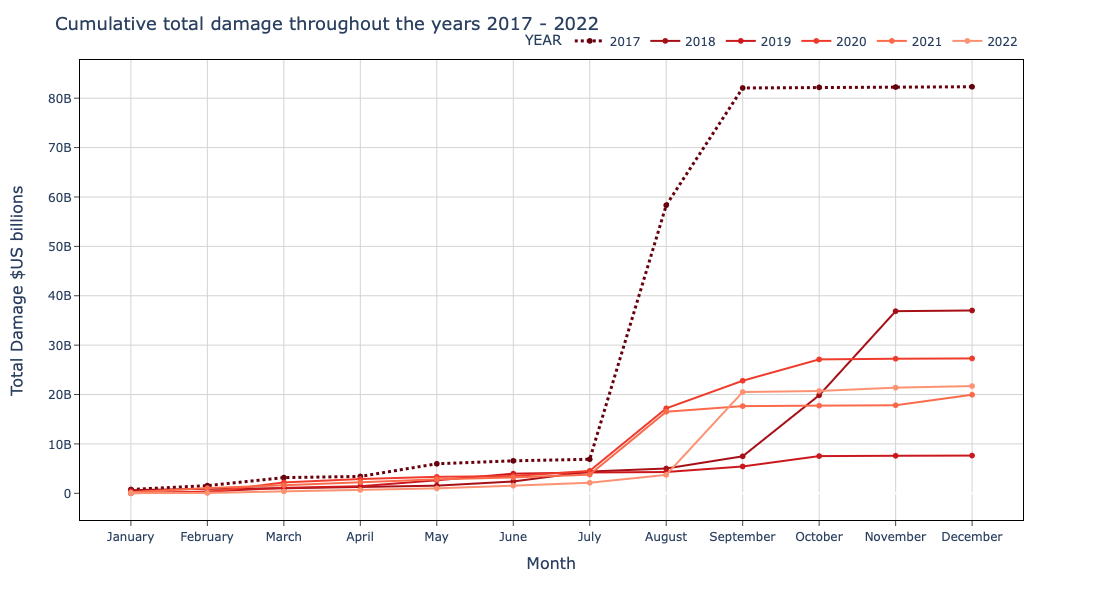

In [68]:


fig = px.line(cumulative_table_melted
              , x='MONTH_NAME'
              , y='DAMAGE_TOTAL'
              , color='YEAR'
              , color_discrete_sequence = px.colors.sequential.Reds_r
              , markers=True)

fig.update_layout(title=dict(text="Cumulative total damage throughout the years 2017 - 2022", font=dict(size=18))
                  , xaxis_title = "Month"
                  , yaxis_title = "Total Damage $US billions"
                  , plot_bgcolor='white'
                  , legend=dict(orientation="h", yanchor="bottom", y=1.01, xanchor="right", x=1)
                  , width=1200
                  , height=600
                  , xaxis=dict(title=dict(font=dict(size=16)))
                  , yaxis=dict(title=dict(font=dict(size=16)))
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(selector=dict(name='2017'), line=dict(dash='dot', width=3))


fig.show()

###Interpretation:
2017 has the highest accmulative total damage, with a startling rise in July and August.

#### **Visualization 2： Storm Events: Total Damage and Numbers By Type in 2017**

Question: What are the types of storm events that caused the most damaged and that are most frequent?

In [69]:
category = 'GENERAL_EVENT_TYPE'
year = 2017
storm_data_scatter = storm_data[storm_data['BEGIN_DATE_TIME'].dt.year==2017].groupby(by = [category]).agg({'DAMAGE_TOTAL': ['sum', 'mean'], 'EVENT_ID': 'count'}).reset_index()
storm_data_scatter.columns = ["".join(a) for a in storm_data_scatter.columns.to_flat_index()]
storm_data_scatter['DAMAGE_TOTALmean_log'] = np.log(storm_data_scatter['DAMAGE_TOTALmean'], )
storm_data_scatter = storm_data_scatter[storm_data_scatter['DAMAGE_TOTALmean']>1]
storm_data_scatter.head()

GENERAL_EVENT_TYPE  DAMAGE_TOTALsum  DAMAGE_TOTALmean  EVENT_IDcount  \
0            Drought     3.570000e+05      2.926230e+02           1220   
1           Flooding     6.551456e+10      8.135423e+06           8053   
2             Freeze     9.541280e+08      8.296765e+05           1150   
3              Storm     4.223625e+09      1.110195e+05          38044   
4   Tropical Cyclone     1.115597e+10      2.244662e+07            497   

   DAMAGE_TOTALmean_log  
0              5.678885  
1             15.911738  
2             13.628791  
3             11.617461  
4             16.926650

In [70]:
#Proportion of hurricans among all the events
round(100*storm_data_scatter['EVENT_IDcount'][storm_data_scatter['GENERAL_EVENT_TYPE']=='Tropical Cyclone'].sum()/storm_data_scatter['EVENT_IDcount'].sum())

1

In [71]:
#proportion of hurricans dammage among the total cost
round(100*storm_data_scatter['DAMAGE_TOTALsum'][storm_data_scatter['GENERAL_EVENT_TYPE']=='Tropical Cyclone'].sum()/storm_data_scatter['DAMAGE_TOTALsum'].sum())

14

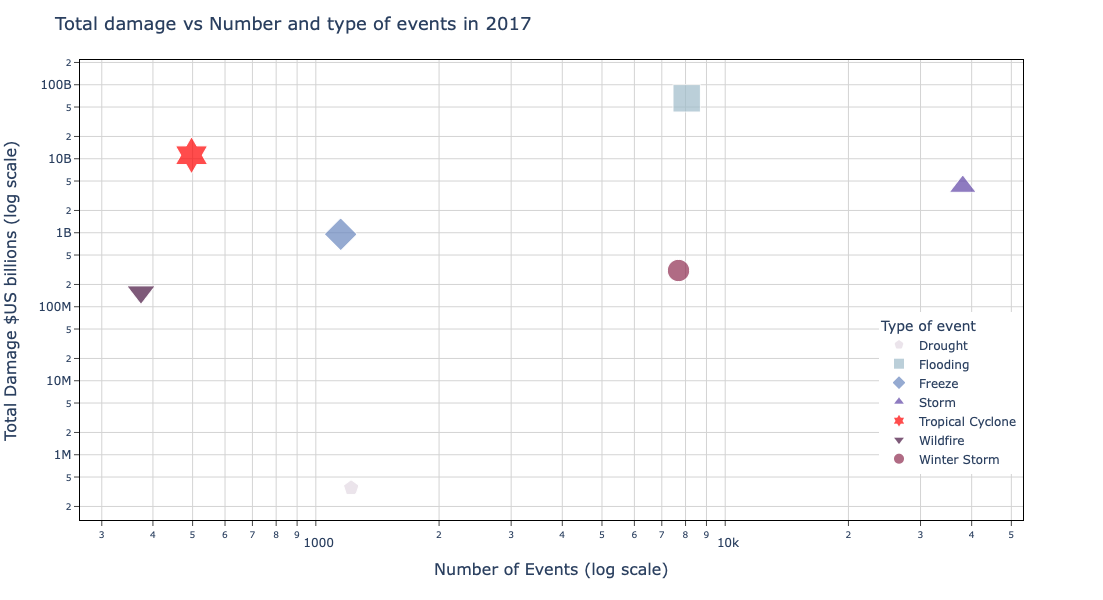

In [72]:
fig = px.scatter(storm_data_scatter
                 , x = "EVENT_IDcount"
                 , y = "DAMAGE_TOTALsum"
                 , color = "GENERAL_EVENT_TYPE"
                 , size = "DAMAGE_TOTALmean_log"
                 , log_x = True
                 , log_y = True
                 , color_discrete_sequence = px.colors.cyclical.Twilight
                )

fig.update_layout(title=dict(text="Total damage vs Number and type of events in 2017 ", font=dict(size=18))
                  , xaxis_title = "Number of Events (log scale)"
                  , yaxis_title = "Total Damage $US billions (log scale)"
                  , plot_bgcolor='white'
                  , legend=dict(title="Type of event", orientation="v", yanchor="bottom", y=0.1, xanchor="right", x=1)
                  , width=800
                  , height=600
                  , xaxis=dict(title=dict(font=dict(size=16)),showgrid=True)
                  , yaxis=dict(title=dict(font=dict(size=16)),showgrid=True)
)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker=dict(symbol='circle'), selector=dict(name='Winter Storm'))
fig.update_traces(marker=dict(symbol='square'), selector=dict(name='Flooding'))
fig.update_traces(marker=dict(symbol='diamond'), selector=dict(name='Freeze'))
fig.update_traces(marker=dict(symbol='triangle-up'), selector=dict(name='Storm'))
fig.update_traces(marker=dict(symbol='pentagon'), selector=dict(name='Drought'))
fig.update_traces(marker=dict(symbol='hexagram', color = 'red'), selector=dict(name='Tropical Cyclone'))
fig.update_traces(marker=dict(symbol='triangle-down'), selector=dict(name='Wildfire'))

fig.show()

###Interpretation:
Flooding caused the most damage and storms are most frequent.

#### **Visualization 3： The Map of Total Damage by State in 2017**

*Question:* What are the states that suffered from most damages from storm disaster in US in 2017?

In [73]:
# We will now use only the data from 2017
storm_data = storm_data[storm_data['YEAR']==2017]

In [74]:
storm_data_damage = storm_data.copy()
storm_data_damage = storm_data_damage[['STATE','DAMAGE_TOTAL']].groupby('STATE').sum()

In [75]:
# Merge the shape file with the datasets containing DAMAGE_TOTAL
US['NAME'] = US['NAME'].str.upper()
US = US.merge(storm_data_damage, left_on = 'NAME' ,right_on = 'STATE', how = 'left')

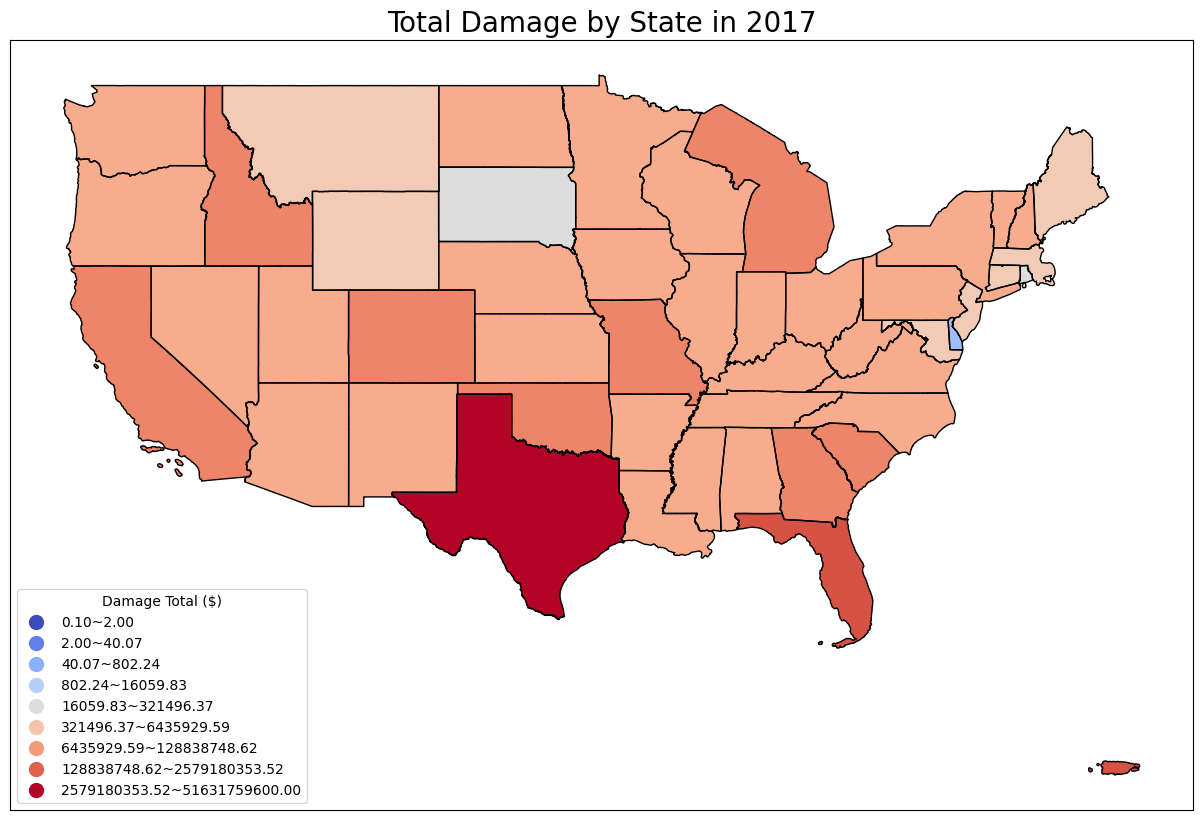

In [76]:
# Draw the Map, and make the graph more informative by resetting bins to log6 distribution
min_damage = max(US['DAMAGE_TOTAL'].min(), 1e-1)
max_damage = US['DAMAGE_TOTAL'].max()
bin_edges = np.logspace(np.log(min_damage)/np.log(6), np.log(max_damage)/np.log(6), base= 6.0, num=10)
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
US.geometry.boundary.plot(ax=ax, edgecolor='k', linewidth=1)
plt.title('Total Damage by State in 2017', fontsize=20)
US.plot(column='DAMAGE_TOTAL', cmap='coolwarm', ax=ax, legend=True, scheme='user_defined', classification_kwds={'bins':bin_edges})
labels = [f"{bin_edges[i]:.2f}~{bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]
cmap = plt.cm.coolwarm
norm = mcolors.BoundaryNorm(bin_edges, cmap.N)
colors = [cmap(norm(bin_edges[i])) for i in range(len(bin_edges)-1)]

patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i],
            label="{:s}".format(labels[i]))[0] for i in range(len(labels))]
plt.legend(handles=patches, title="Damage Total ($)", loc='lower left')
plt.xticks([])
plt.yticks([])
plt.show()

###Interpretation:
Our data paints a vivid picture of total damage in 2017 caused by storm events, encompassing both property and crop losses. Texas suffered the most severe damages, while Florida and Puerto Rio suffered second-tier damages.

#### **Visualization 4**： Distribution of Total Damage Costs in 2017

*Question:*
What is the distribution of different scales of damages caused by storms?

In [77]:
storm_data_damage_ = storm_data.copy()


In [78]:
#Create categories with intervals from the total damage and then create a stacked barplot with date on the x-axis and counts on the y-axis

#Total Damage in Category
bins = [0, 1000, 1000000 ,1000000000, float('inf')]
labels= ['0-100k', '100k-1M', '1M-10M', '10M+']
storm_data_damage_['DAMAGE_TOTAL_CAT'] = pd.cut(storm_data_damage_['DAMAGE_TOTAL'], bins = bins, labels = labels)
storm_data_damage_.head()

BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME  \
0           201704          6        1509         201704        6      1509   
1           201704          6         930         201704        6       940   
2           201704          5        1749         201704        5      1753   
3           201704         16        1759         201704       16      1900   
4           201704         15        1550         201704       15      1550   

   EPISODE_ID  EVENT_ID       STATE  STATE_FIPS  YEAR MONTH_NAME  \
0      113355    678791  NEW JERSEY          34  2017      April   
1      113459    679228     FLORIDA          12  2017      April   
2      113448    679268        OHIO          39  2017      April   
3      113697    682042        OHIO          39  2017      April   
4      113683    682062    NEBRASKA          31  2017      April   

          EVENT_TYPE CZ_TYPE  CZ_FIPS     CZ_NAME  WFO     BEGIN_DATE_TIME  \
0  Thunderstorm Wind       C       15  GLOUCESTER  PHI 2017-04-06 15:09:00   
1            Tornado       C       71         LEE  TBW 2017-04-06 09:30:00   
2  Thunderstorm Wind       C       57      GREENE  ILN 2017-04-05 17:49:00   
3              Flood       C       25    CLERMONT  ILN 2017-04-16 17:59:00   
4               Hail       C       25        CASS  OAX 2017-04-15 15:50:00   

  CZ_TIMEZONE       END_DATE_TIME  INJURIES_DIRECT  INJURIES_INDIRECT  \
0       EST-5 2017-04-06 15:09:00                0                  0   
1       EST-5 2017-04-06 09:40:00                1                  0   
2       EST-5 2017-04-05 17:53:00                0                  0   
3       EST-5 2017-04-16 19:00:00                0                  0   
4       CST-6 2017-04-15 15:50:00                0                  0   

   DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  DAMAGE_CROPS  \
0              0                0              0.0           0.0   
1              0                0         110000.0           0.0   
2              0                0           1000.0           0.0   
3              0                0           5000.0           0.0   
4              0                0              0.0           0.0   

              SOURCE  MAGNITUDE FLOOD_CAUSE CATEGORY  \
0    Trained Spotter       52.0    No Flood      0.0   
1  Emergency Manager        0.0    No Flood      0.0   
2      Amateur Radio       50.0    No Flood      0.0   
3             Public        0.0  Heavy Rain      0.0   
4    Trained Spotter        1.5    No Flood      0.0   

                                   EPISODE_NARRATIVE  \
0  Low pressure tracked from the Ohio Valley into...   
1  A line of thunderstorms developed along a pref...   
2  Showers and thunderstorms developed ahead of a...   
3  Thunderstorms with very heavy rain developed a...   
4  An upper level storm system moved into Nebrask...   

                                     EVENT_NARRATIVE DATA_SOURCE  \
0  A couple of trees were taken down due to thund...         CSV   
1  Emergency management reported and broadcast me...         CSV   
2  An entire tree was uprooted in a yard on Dayto...         CSV   
3        Garage of a home was flooded by high water.         CSV   
4  An upper level storm system moved into Nebrask...         CSV   

   DAMAGE_TOTAL  EVENT_DURATION STATE CODE     REGION            DIVISION  \
0           0.0        0.000000         NJ  Northeast     Middle Atlantic   
1      110000.0        0.006944         FL      South      South Atlantic   
2        1000.0        0.002778         OH    Midwest  East North Central   
3        5000.0        0.042361         OH    Midwest  East North Central   
4           0.0        0.000000         NE    Midwest  West North Central   

              REGION_DIVISION GENERAL_EVENT_TYPE DAMAGE_TOTAL_CAT  
0   Northeast-Middle Atlantic              Storm              NaN  
1        South-South Atlantic              Storm          100k-1M  
2  Midwest-East North Central              Storm    

In [79]:
# Group by date and category and count occurrences
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
storm_data_damage_['MONTH_NAME'] = pd.Categorical(storm_data_damage_['MONTH_NAME'], categories=month_order, ordered=True)
damage_data = storm_data_damage_.groupby(['MONTH_NAME', 'DAMAGE_TOTAL_CAT']).size().unstack(fill_value=0)
damage_data.sample(5)

/var/folders/yn/wgk34zmj7l76cvzy1ddgg2p80000gn/T/ipykernel_15122/3222241313.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



DAMAGE_TOTAL_CAT  0-100k  100k-1M  1M-10M  10M+
MONTH_NAME                                     
February              67      398      42     0
July                 413     1318      51     0
May                  538     1549      31     1
December              75      254       3     0
October               98      459      11     0

<Figure size 2000x1200 with 0 Axes>

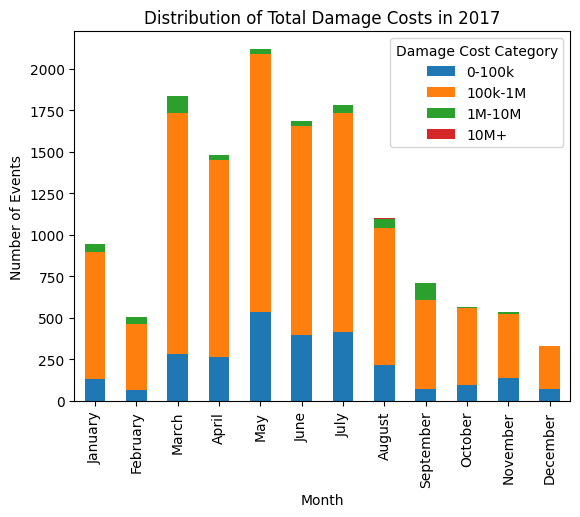

In [80]:
# Stacked barplot
plt.figure(figsize=(20, 12))
damage_data.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.title('Distribution of Total Damage Costs in 2017')
plt.legend(title='Damage Cost Category', loc='upper right')
plt.show()

###Interpretation:
We see that the events with damages 100k-100m is the most prevalent across the months.

#### **Visualization 5: Total Number of top 5 Types of Storm Events by Region in 2017**



Question: What are the top 5 types of storm events by number across the major regions in US in 2017?

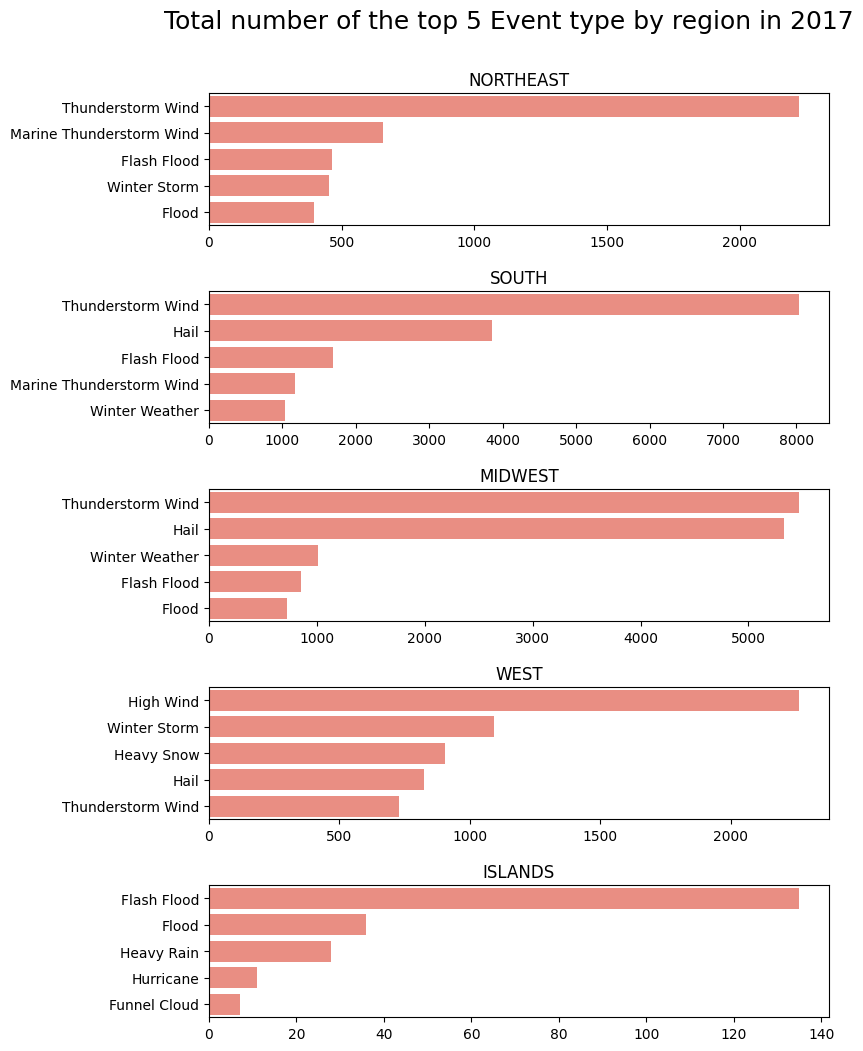

In [81]:
col_analysis = 'EVENT_TYPE'
col_grouping = 'REGION'

grouping_list = list(storm_data[col_grouping].unique())
subplot_cols = 1
subplot_rows = 5

plt.figure(figsize=(8, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Total number of the top 5 Event type by region in 2017", fontsize=18, y=0.95)


# loop through the length of tickers and keep track of index
for n, group in enumerate(grouping_list):
    # add a new subplot iteratively
    ax = plt.subplot(subplot_rows, subplot_cols, n + 1)

    # filter df and plot ticker on the new subplot axis
    storm_subplot = storm_data[storm_data[col_grouping]==group][['EVENT_ID',col_analysis]].groupby(by=[col_analysis]).count().sort_values(by='EVENT_ID', ascending=False).head(5)
    sns.barplot(ax=ax, data = storm_subplot, x = 'EVENT_ID', y = storm_subplot.index , color ='salmon')
    #df[df["ticker"] == ticker].plot(ax=ax)

    # chart formatting
    ax.set_title(group.upper())
    ax.set_xlabel("")
    ax.set_ylabel("")


###Interpretation:
 Overall the events related to Winds are the most common events despite the differences by region expet the islands where the flood is the most frequent type.

#### **Visualization 6: Total Damage of Storm Events in the 3 Most Affected States**

Question: Among the 3 most affected states, what's the rank of total damage caused by storm?

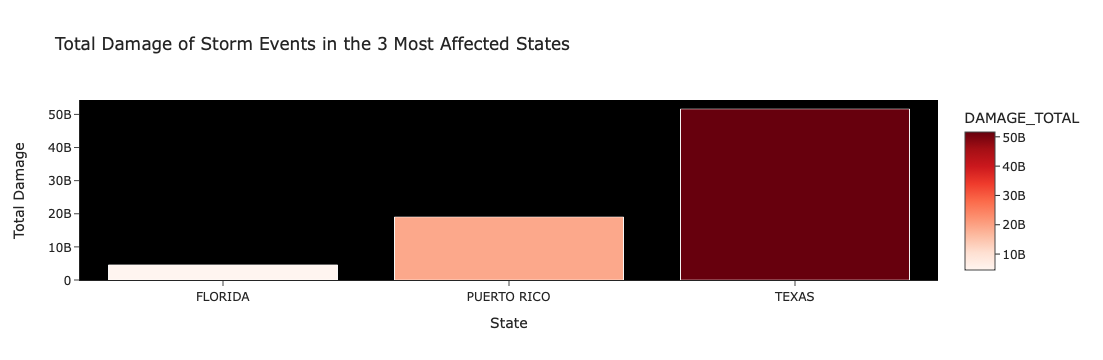

In [82]:
# create barplot for Texas, Florida and Porto Rico by Total Damage
storm_data_damage_focus = storm_data_damage.reset_index()
storm_data_damage_focus = storm_data_damage_focus[storm_data_damage_focus['STATE'].isin (['FLORIDA', 'PUERTO RICO', 'TEXAS'])]


fig = px.bar(storm_data_damage_focus, x='STATE', y='DAMAGE_TOTAL', color='DAMAGE_TOTAL',
             color_continuous_scale='Reds', title='Total Damage of Storm Events in the 3 Most Affected States')
fig.update_xaxes(title_text='State')
fig.update_yaxes(title_text='Total Damage')
fig.update_layout(legend_title_text='Damage Scale')
fig.update_layout(template="simple_white", plot_bgcolor='black'
)
fig.show()


###Interpretation:
Texas ranked first followed by Puerto Rico and Florida.

#### **Visualization 7: Frequency of Storm Events of the 3 Most Affected States**

Question: Among the 3 most affected states, what's the rank of frequency of storm?

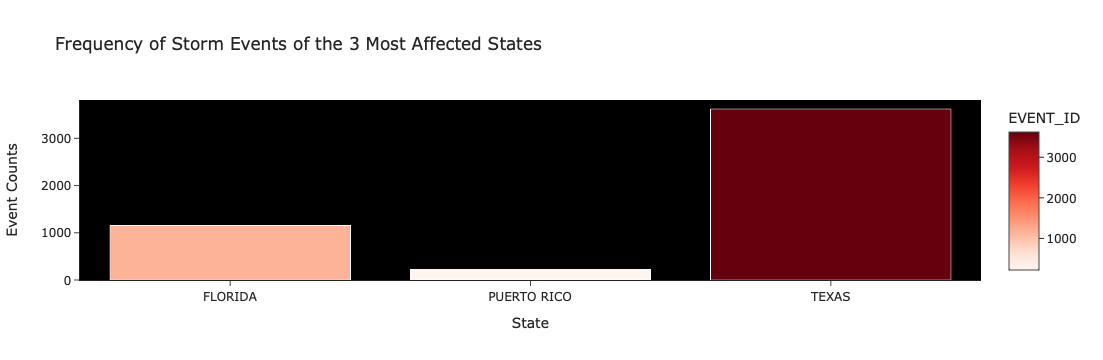

In [83]:
# create barplot for Texas, Florida and Porto Rico by frequency
storm_data_number = storm_data.copy()
storm_data_number = storm_data_number[['STATE','EVENT_ID']].groupby('STATE').count()
storm_data_number_focus = storm_data_number.reset_index()
storm_data_number_focus = storm_data_number_focus[storm_data_number_focus['STATE'].isin (['FLORIDA', 'PUERTO RICO', 'TEXAS'])]

fig = px.bar(storm_data_number_focus, x='STATE', y='EVENT_ID', color='EVENT_ID',
             color_continuous_scale='reds', title='Frequency of Storm Events of the 3 Most Affected States')
fig.update_xaxes(title_text='State')
fig.update_yaxes(title_text='Event Counts')
fig.update_layout(legend_title_text='Event Counts')
fig.update_layout(template="simple_white", plot_bgcolor='black')
fig.show()


###Interpretation:
Texas ranked first followed by Florida and Puerto Rico.

#### **Visualization 8: Outlayed Disaster Funds for the 3 Most Affected States**

Question: Among the 3 most affected states, what's the rank of the outlayed disaster funds they received?

In [89]:
# import the fema dataset
fema = pd.read_csv('FEMA_FUNDING_2017_2019.csv')

In [90]:
def convert_to_negative(x):
    if isinstance(x, str):
        if x.startswith('(') and x.endswith(')'):
            return '-' + x[1:-1]
        return x
    return x

fema['Outlayed'] = fema['Outlayed'].str.replace('[$,]', '', regex=True).apply(convert_to_negative)
fema['Outlayed'] = pd.to_numeric(fema['Outlayed'])

print(fema['Outlayed'].dtype)

float64


In [91]:
fema.State.unique()

array(['GA', 'SC', 'No State Breakdown', 'FL', 'PR', 'TX', 'IN', 'DC',
       'LA', 'TN', 'USVI', 'MD', 'AZ', 'CA', 'MI', 'ND', 'AL', 'KY', 'NC',
       'VA', 'IA', 'MP', 'OR', 'MS', 'SD', 'OK', 'NV', 'KS', 'WY', 'WA',
       'ID', 'UT', 'NH', 'MO', 'AR', 'NE', 'NY', 'VT', 'WV', 'WI', 'AK',
       'NM', 'ME', 'AS', 'OH', 'HI', 'NJ', 'MA', 'CT', 'MT', 'MN', 'CNMI',
       'GU', 'PA', 'IL', 'DE', 'CO', 'RI', 'Other States', 'MH',
       'NO STATE BREAKDOWN', nan], dtype=object)

In [101]:
#make a copy
fema_copy = fema.copy()

#change str to numeric

# List of columns to process
columns_to_convert = ['Announced/Allocated', 'Appropriated', 'Obligated', 'Outlayed']

# Loop through each column
for column in columns_to_convert:
    fema_copy[column] = pd.to_numeric(fema[column].astype(str).str.replace('[$,]', '', regex=True), errors= 'coerce')

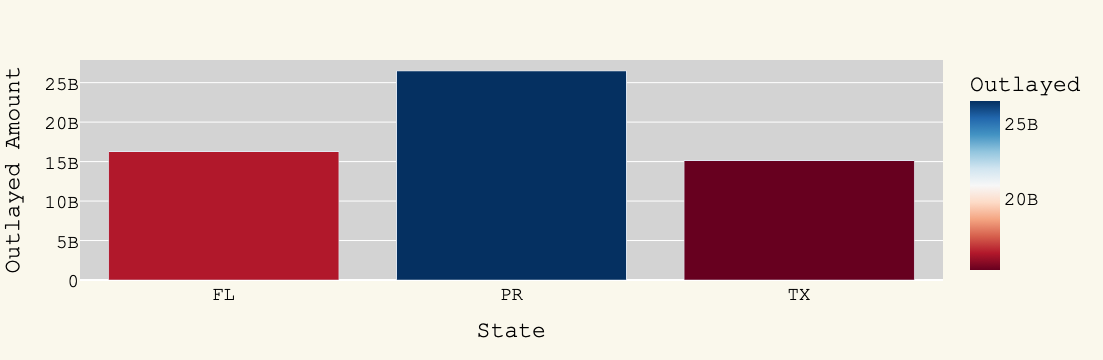

In [102]:
fema_outlay = fema.groupby('State').sum('Outlayed')
fema_outlay = fema_outlay.reset_index()
fema_outlay = fema_outlay[fema_outlay['State'].isin (['FL', 'PR', 'TX'])]
# sns.barplot(fema_outlay, x = 'State', y = 'Outlayed', palette = 'coolwarm')
# plt.show()

#using plotly
fig = px.bar(fema_outlay, x='State', y='Outlayed', color='Outlayed', color_continuous_scale='RdBu')

fig.update_layout(
    font=dict(
        family="Courier New",
        size=19,  # Set the font size here
        color="Black"
    ),
    paper_bgcolor='#FAF8EC',
    plot_bgcolor='lightgrey',
    xaxis=dict(title='State', color ='Black'),
    yaxis=dict(title='Outlayed Amount', color = 'Black')
)

fig.show()

###Interpretation:
Puerto Rico ranked first followed by Florida and Texas.

#### **Visualization 9: FEMA Funding 2017: Announced vs Outlayed by State**

Question: What's the proportion like for the outlayed / announced disaster funds for the 3 most affected states?

In [103]:
states = ['PR', 'TX', 'FL']
columns_to_sum = ['Announced/Allocated', 'Obligated', 'Outlayed']
totals_df = pd.DataFrame()
fema_copy = fema

for state in states:
    fema_state = fema_copy.loc[fema_copy['State'] == state, ['Date', 'Announced/Allocated', 'Obligated', 'Outlayed', 'State']]
    total_sum = fema_state[columns_to_sum].sum()
    announce_minus_outlay = total_sum['Announced/Allocated'] - total_sum['Outlayed']
    percentage = total_sum['Outlayed'] / total_sum['Announced/Allocated'] * 100

    # Create a DataFrame for each state
    state_df = pd.DataFrame({
        'State': [state],
        'Total_Announced': [total_sum['Announced/Allocated']],
        'Total_Obligated': [total_sum['Obligated']],
        'Total_Outlayed': [total_sum['Outlayed']],
        'Differences' : [announce_minus_outlay],
        'Percentage': [percentage]
    })

    # Concatenate the state DataFrame to the result_df
    totals_df = pd.concat([totals_df, state_df], ignore_index=True)

totals_df


State  Total_Announced  Total_Obligated  Total_Outlayed   Differences  \
0    PR     7.497527e+10     7.215595e+10    2.647310e+10  4.850217e+10   
1    TX     2.944569e+10     2.508393e+10    1.515423e+10  1.429146e+10   
2    FL     2.382787e+10     2.327492e+10    1.626922e+10  7.558646e+09   

   Percentage  
0   35.309107  
1   51.465031  
2   68.278128

In [104]:
#Melting the dataframe in order to use for treemap visualization
#Only using Total Announced and Total Outlayed in order to show the gap between these two fundings
melted_df = pd.melt(totals_df, id_vars=['State'], value_vars=['Total_Announced', 'Total_Outlayed'],
                    var_name='Variable', value_name='Value')
melted_df['Variable'] = melted_df['Variable'].replace({'Total_Outlayed': 'Outlayed', 'Total_Announced': 'Announced'})

print(melted_df)

  State   Variable         Value
0    PR  Announced  7.497527e+10
1    TX  Announced  2.944569e+10
2    FL  Announced  2.382787e+10
3    PR   Outlayed  2.647310e+10
4    TX   Outlayed  1.515423e+10
5    FL   Outlayed  1.626922e+10


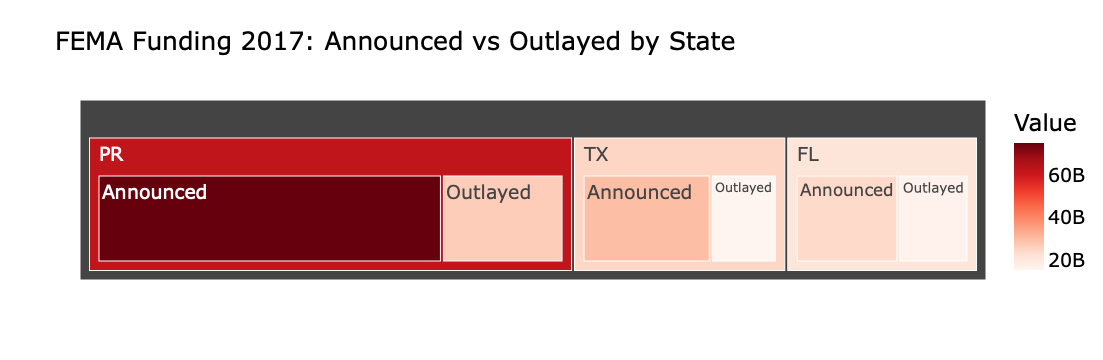

In [105]:
#Making the treemap
fig = px.treemap(melted_df, path=['State', 'Variable'], values='Value',
                 title='Total Announced vs. Total Outlayed by State',
                 color='Value', color_continuous_scale='reds')

# Customize the layout
fig.update_layout(
    title=dict(text='FEMA Funding 2017: Announced vs Outlayed by State', font=dict(size=25), yref='paper'),
    font=dict(family="Verdana", size=19, color="Black")
)

fig.show()


###Interpretation:
The treemap offers a way to visualize the proportion of what was intended (announced) and what was acutally given (outlayed). Puerto Rico received the highest total funding from FEMA. Puerto Rico, however has only received around 35% of the funds initially promised to them, underscoring a substantial gap between promises and actual financial support. In contrast, states like Texas and Florida have seen nearly 50-70% of their announced funds outlayed. The actual disbursement (outlayed) does not align proportionally with the announced figures.

The fema funding data highlights notable gaps in Puerto Rico's recovery assistance. While numerous funding efforts were "Announced", an announcement on decisions or intentions about plans, such announcements do not guarantee full financial commitment. The term "outlayed" refers to the actual expediture/disbursement of funds, repreenting concreate financial transaction that reflect the utilization of funds. In the percentage column, we see that out of the three "States", Puerto proportionally received the least of their "Announced" funding.

### **7. Conclusions**


There were significant disparities in the distribution of funding across different regions. The FEMA funding data highlights notable delays in Puerto Rico’s recovery assistance. While numerous funding efforts were announced for Puerto Rico, indicating an announcement on decisions or intentions about plans, such announcement do not guarantee financial commitment. The term ‘outlayed’ refers to the actual expenditure/ disbursement of funds, representing concrete financial transactions that reflect the utilization of funds.

Our calculated losses, encompassing only property and crop damage, may not fully capture the extent of infrastructure damage. A report from Rand Corporation ('Hurricane Impact') highlights Puerto Rico's severe infrastructure damage in critical areas like water supply, electricity, transportation, and communication, which remained unaddressed for an extended period.

The unequal response to the three main hurricanes may have been detrimental to Puerto Rico, with probable effects on long-term health, inequalities, and delays in infrastructure development (Willson, Singer and Creary)

### **8. References**
“Disaster Funding for 2017 - 2019 Hurricanes, California Wildfires and Other Disasters | FEMA.Gov,” November 7, 2023.<https://www.fema.gov/emergency-managers/national-preparedness/frameworks/national-disaster-recovery/support-functions/rsflg/charts>.

“Index of /Pub/Data/Swdi/Stormevents/Csvfiles.” Accessed December 7, 2023.<https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/>.

Ritchie, Hannah and Pablo Rosado. "Natural Disasters." Our World in Data (2022). Published online. <https://ourworldindata.org/natural-disasters>.  

Smith, Adam B. "2017 U.S. billion-dollar weather and climate disasters: a historic year in context." Blog post. 2018. Published online. <https://www.climate.gov/disasters-2017>.  

Team Our World in Data. "Make cities inclusive, safe, resilient and sustainable." Article. 2023. Published online. <https://ourworldindata.org/sdgs/sustainable-cities#11.5.2>.  

Willson, Charley E, et al. "Quantifying inequities in US federal response to hurricane disaster in Texas and Florida compared with Puerto Rico." BMJ Global Health (2019). Document. <https://gh.bmj.com/content/4/1/e001191>.  



